# 2. 2 Exports - EDA

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import kaggle

In [9]:
KAGGLE_USERNAME = "marpenalva"
KAGGLE_KEY = "ea42f53179cfa2f6eac83929293413f4"

kaggle.api.authenticate()

def download_file_from_kaggle(dataset, path):
    kaggle.api.dataset_download_files(dataset, path=path, unzip=True)

dataset = "appetukhov/international-trade-database"  # Dataset correcto
download_path = "data/"

if not os.path.exists(download_path):
    os.makedirs(download_path)

download_file_from_kaggle(dataset, download_path)


file_path = os.path.join(download_path, 'trade_1988_2021.csv')
df = pd.read_csv(file_path)

print(df.head())

Dataset URL: https://www.kaggle.com/datasets/appetukhov/international-trade-database
  ReporterISO3 ReporterName PartnerISO3 PartnerName  Year TradeFlowName  \
0          AFG  Afghanistan         SWE      Sweden  2017        Export   
1          AFG  Afghanistan         JOR      Jordan  2018        Export   
2          AFG  Afghanistan         JOR      Jordan  2017        Export   
3          AFG  Afghanistan         ITA       Italy  2018        Export   
4          AFG  Afghanistan         ITA       Italy  2017        Export   

   TradeValue in 1000 USD  
0                  86.752  
1                2796.481  
2                3100.187  
3                 279.918  
4                 416.642  


In [10]:
df = df[df['PartnerISO3'] == 'WLD']
df

,ReporterISO3,ReporterName,PartnerISO3,PartnerName,Year,TradeFlowName,TradeValue in 1000 USD
74,AFG,Afghanistan,WLD,World,2012,Export,428902.710
75,AFG,Afghanistan,WLD,World,2013,Export,514972.983
76,AFG,Afghanistan,WLD,World,2014,Export,570534.007
77,AFG,Afghanistan,WLD,World,2008,Export,540065.594
208,AFG,Afghanistan,WLD,World,2018,Export,875241.399
...,...,...,...,...,...,...,...
633740,ZWE,Zimbabwe,WLD,World,1994,Export,1967459.968
633741,ZWE,Zimbabwe,WLD,World,2018,Export,4037267.070
633760,ZWE,Zimbabwe,WLD,World,1996,Export,2121938.432
633761,ZWE,Zimbabwe,WLD,World,1995,Export,1845905.792


In [11]:
df = df.rename(columns={'TradeValue in 1000 USD': 'TradeValue'})

In [12]:
df = df.drop(columns=['ReporterISO3', 'PartnerName'])
df = df.rename(columns={'ReporterName': 'Reporter', 'PartnerISO3': 'Partner', 'TradeFlowName': 'TradeFlow'})

In [6]:
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

## 2. 2. 1 World exports 2000 - 2020

In [12]:
for year in range(2000, 2020):

    year_data = df[(df['Year'] == year)]
    
    exports_year = year_data.copy()
    exports_year['TradeFlow'] = 'Export'
    
    fig = px.scatter(exports_year, x='Reporter', y='TradeValue',
                     size='TradeValue',
                     color='TradeValue',
                     hover_name='Reporter', 
                     labels={'TradeValue': 'Trade Value in 1000 USD', 'Reporter': 'Country'},
                     title=f'Exports by country in the year {year}',
                     size_max=60) 
    

    fig.update_layout(width=1000, height=600) 
    fig.show()

pio.write_html(fig, file=f'graphs2/exp/exports_{year}.html', auto_open=False)

## 2.2.2 Top 10 países con más exportaciones 2000 - 2020

C:\Users\maarp\AppData\Local\Temp\ipykernel_30336\3491945843.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


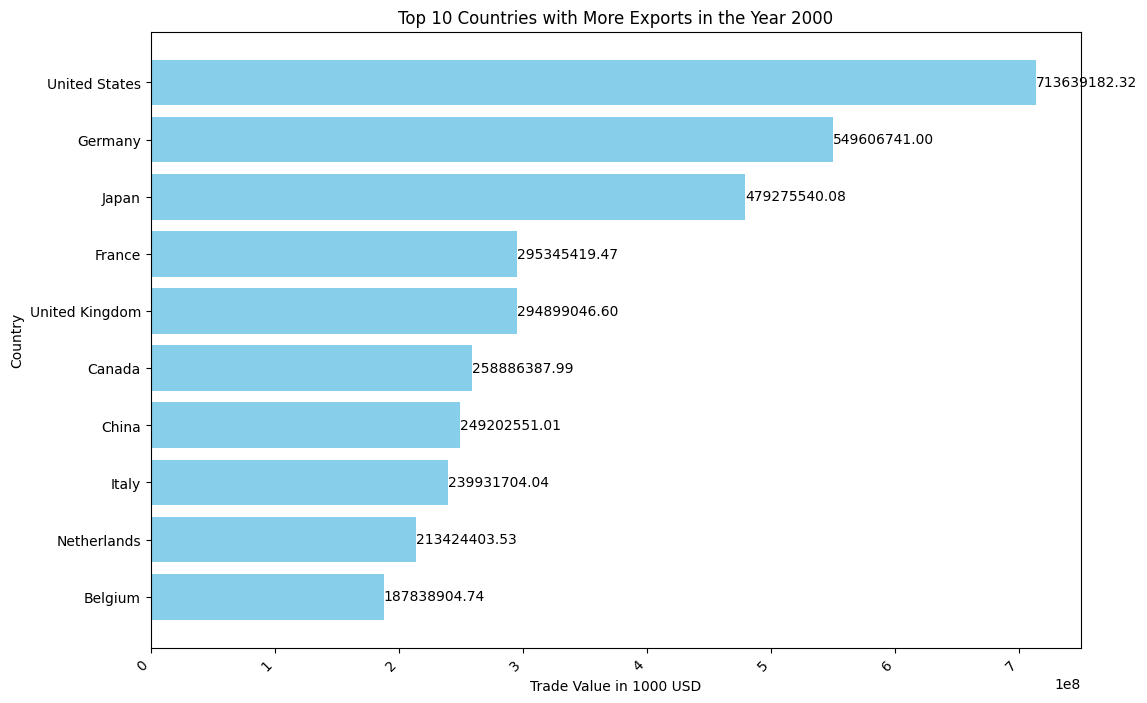

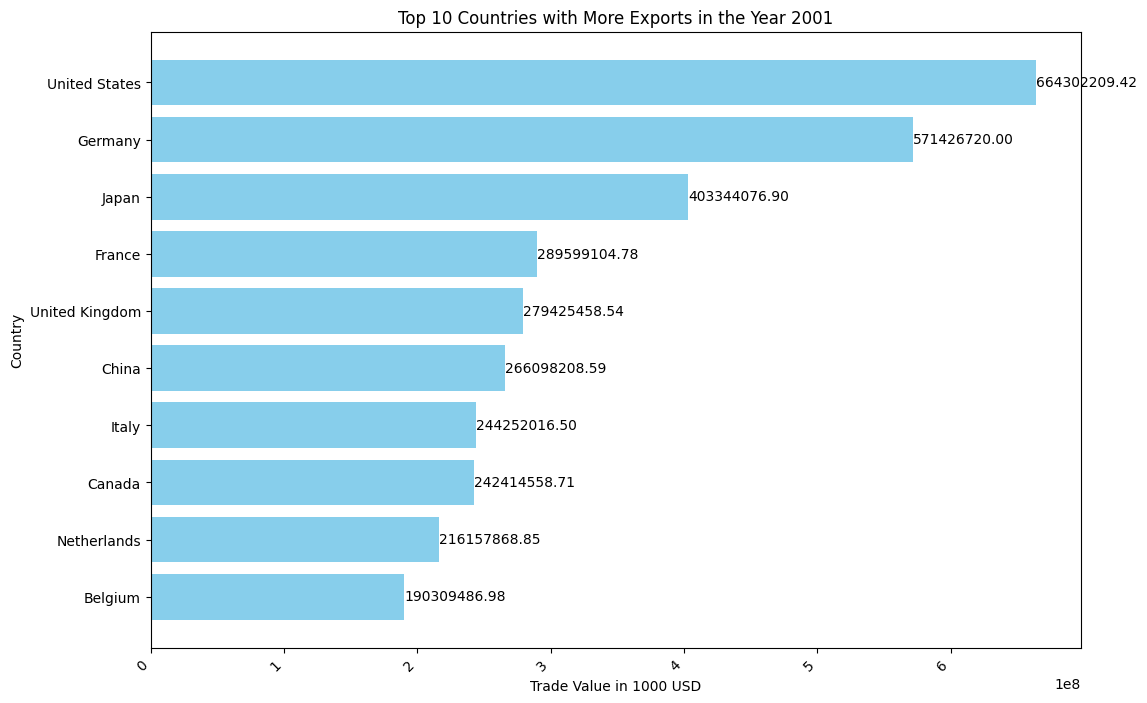

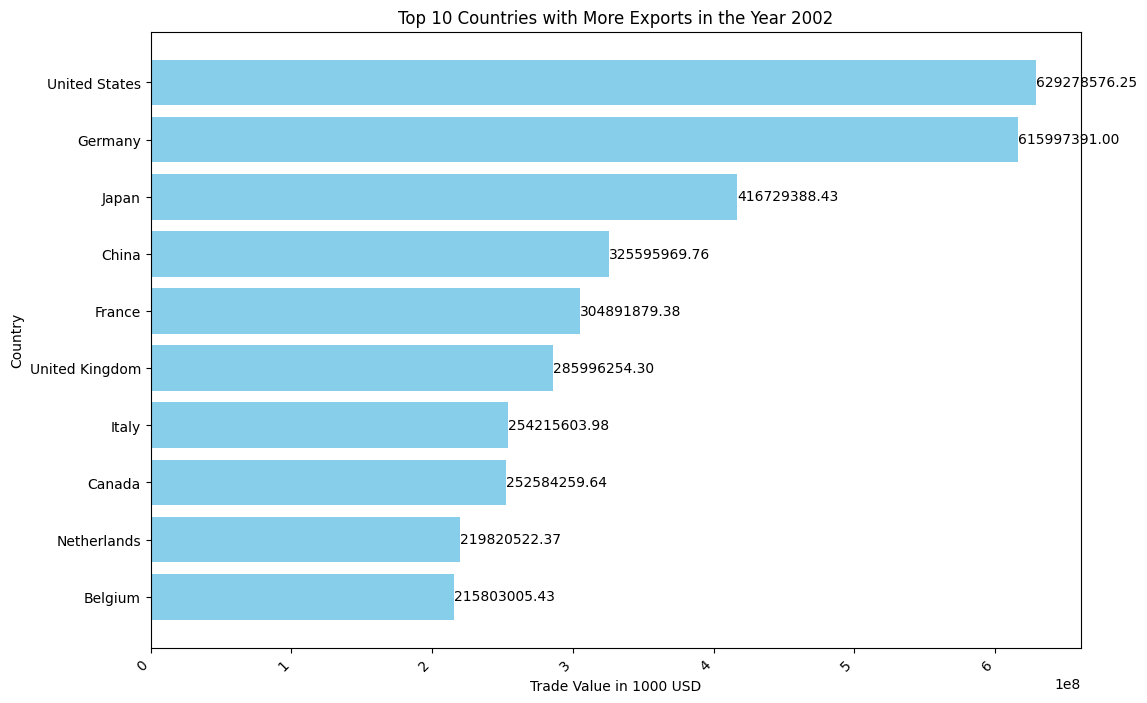

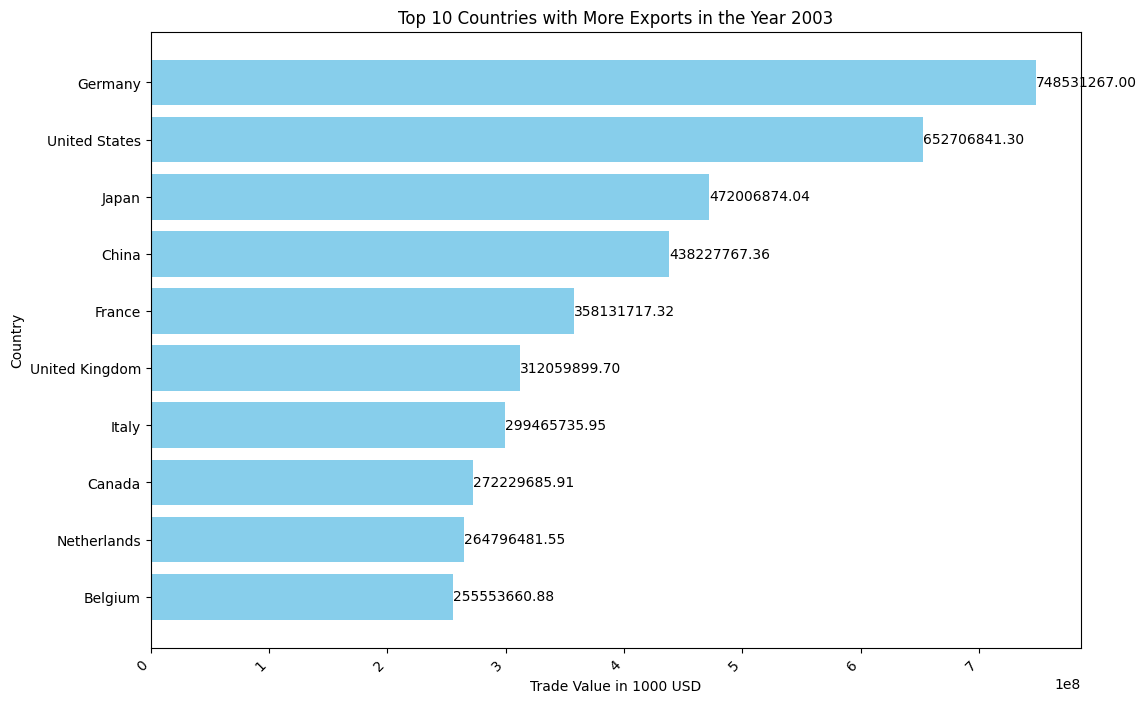

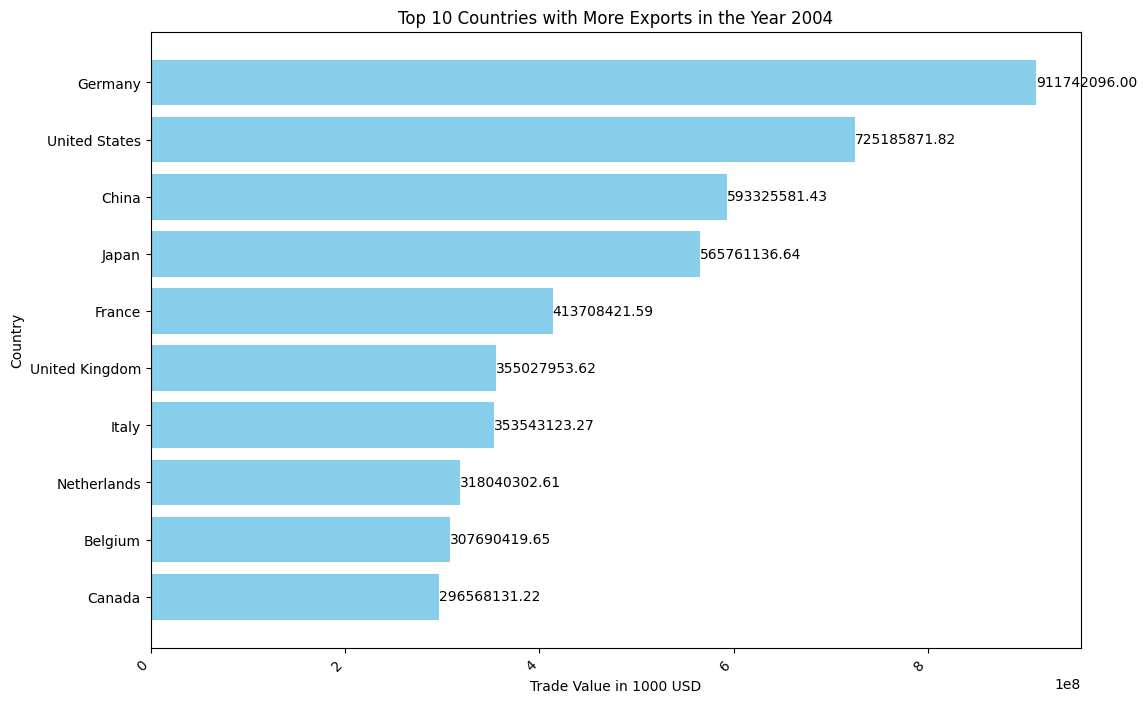

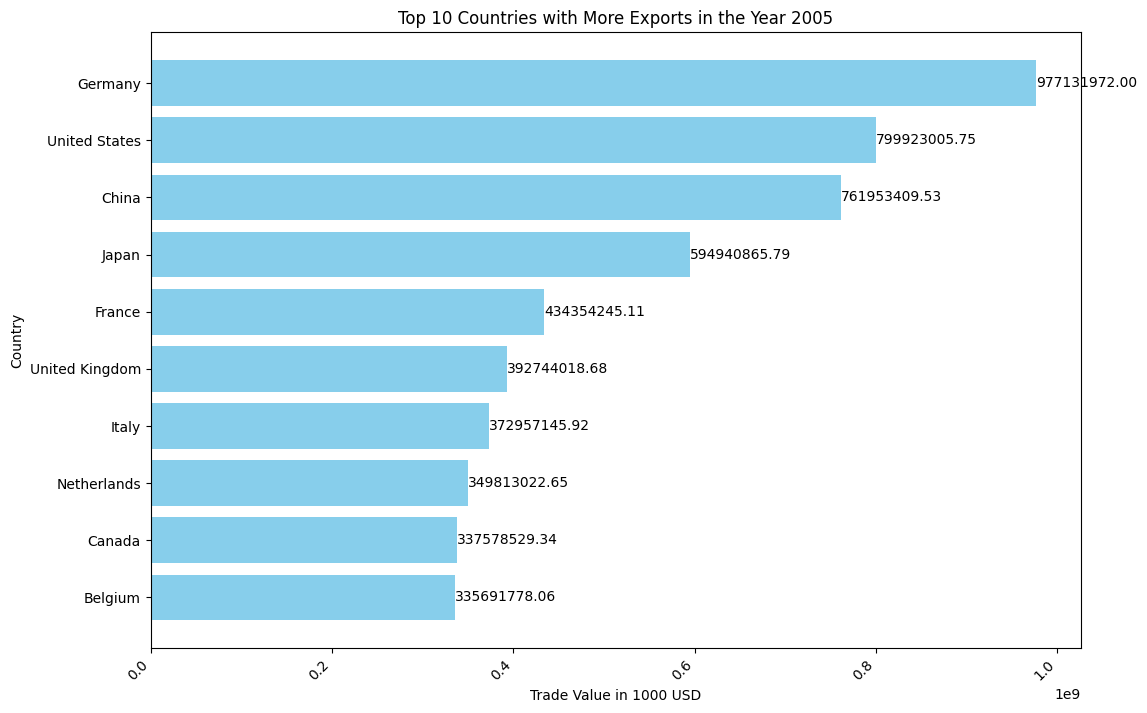

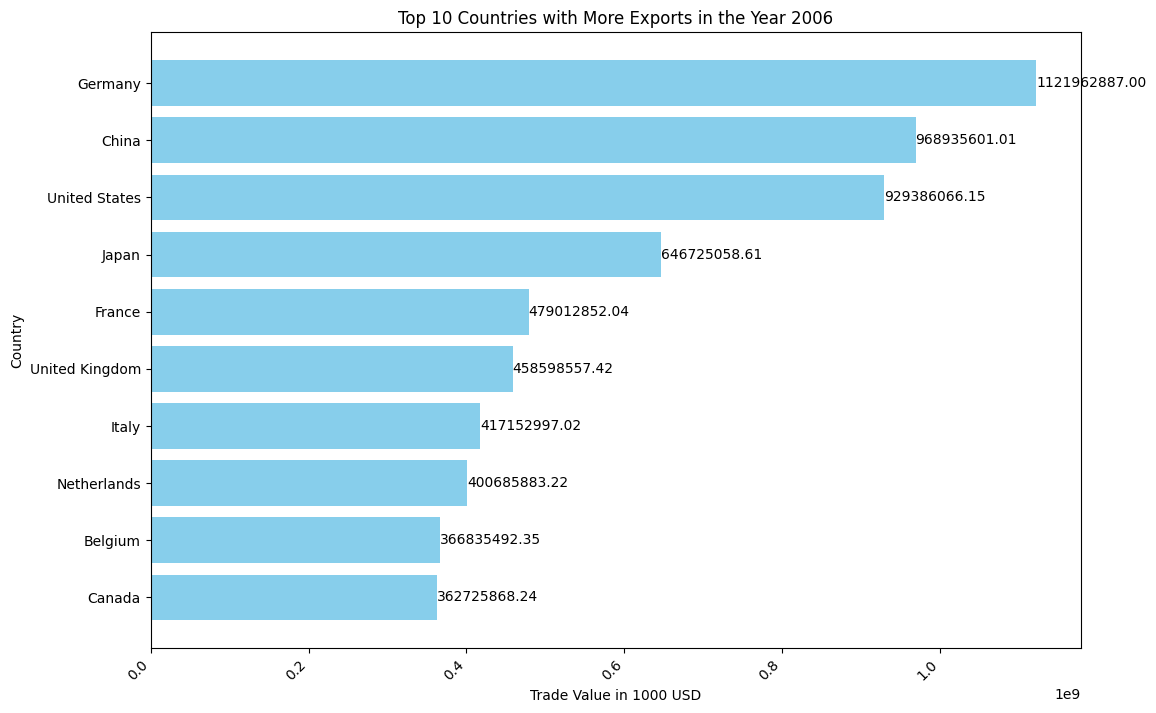

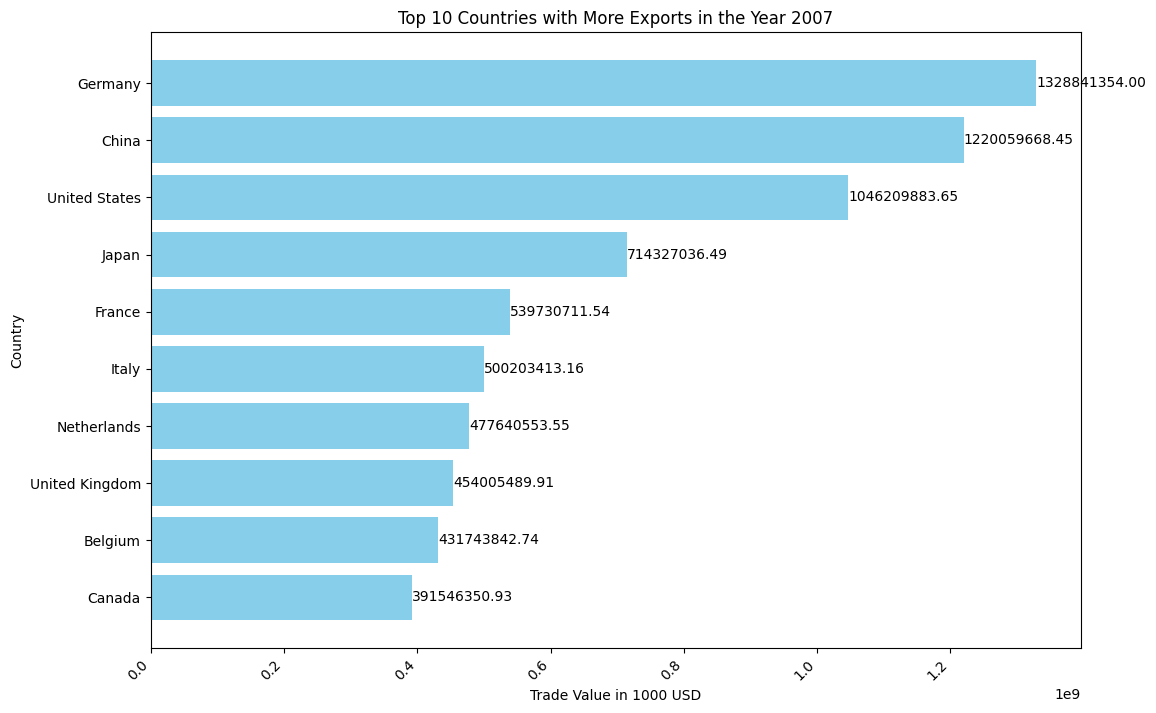

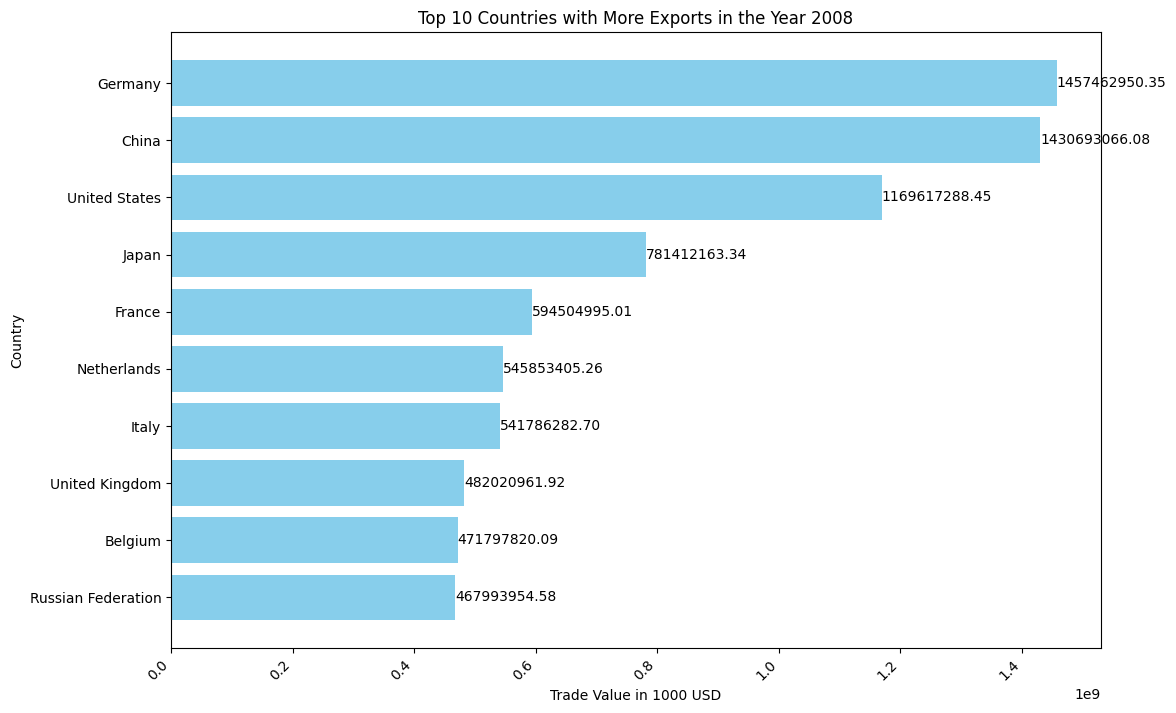

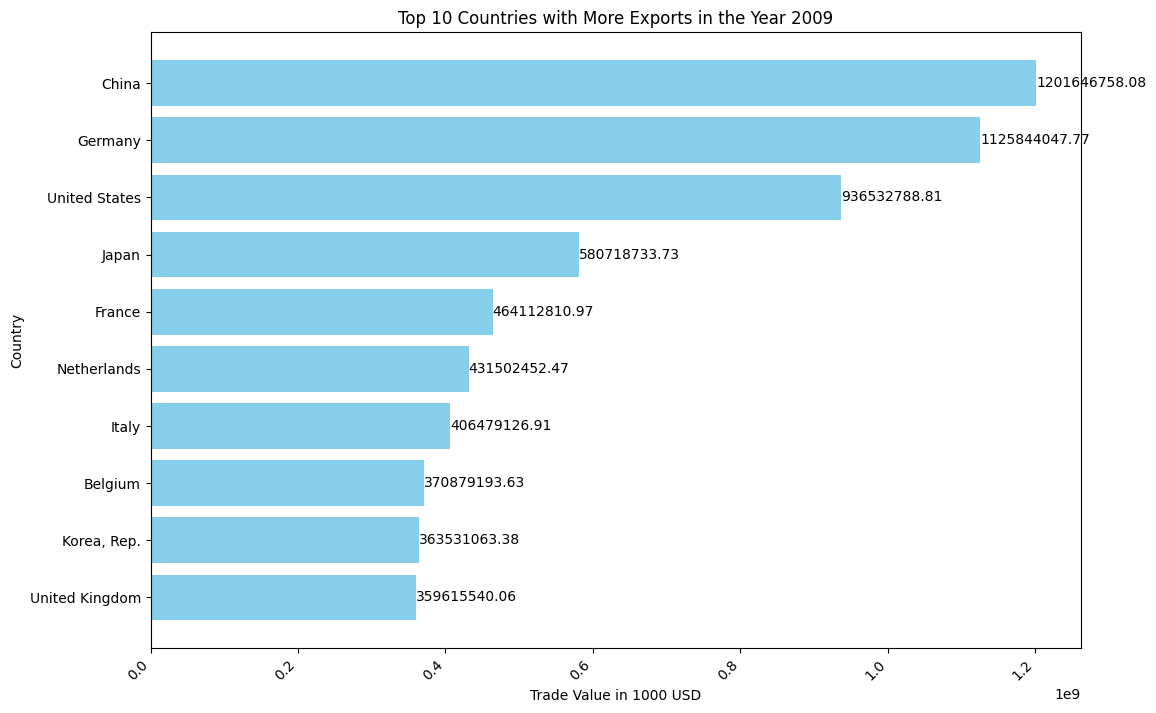

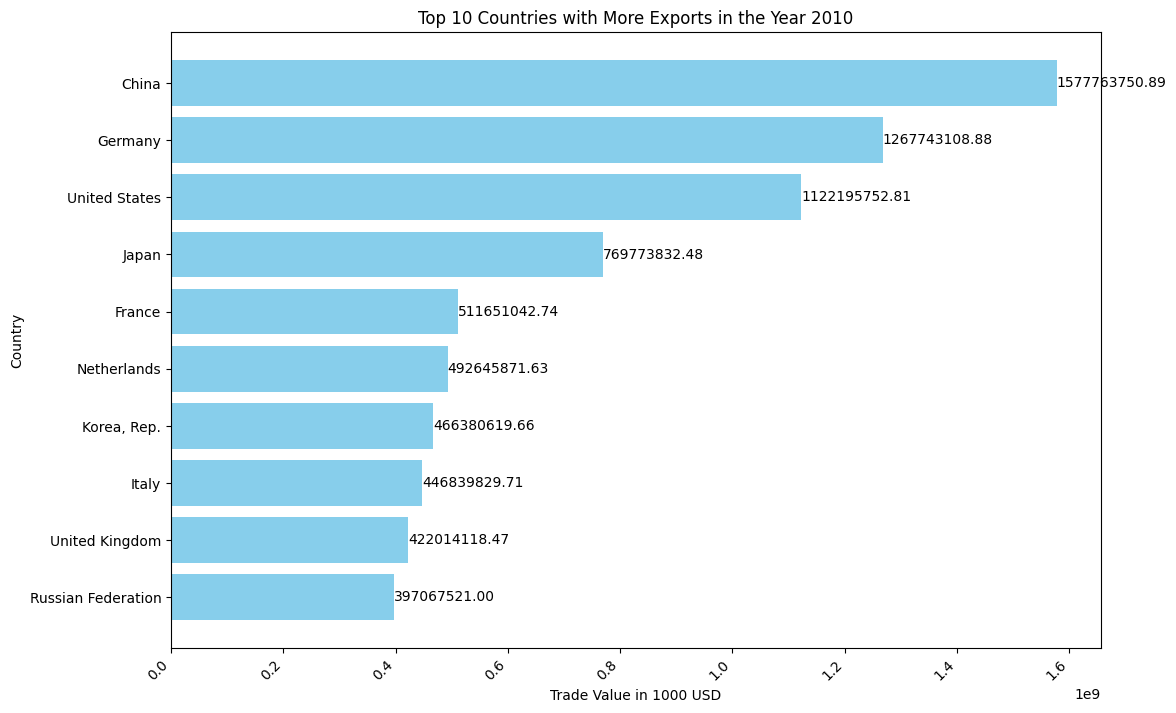

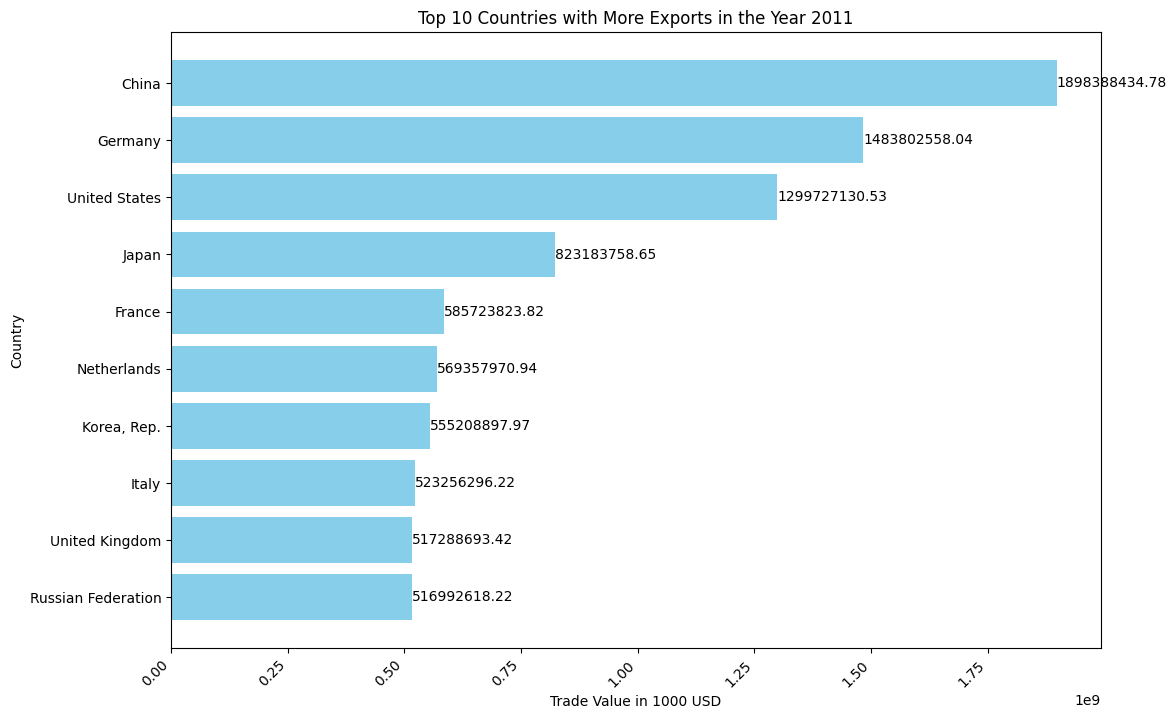

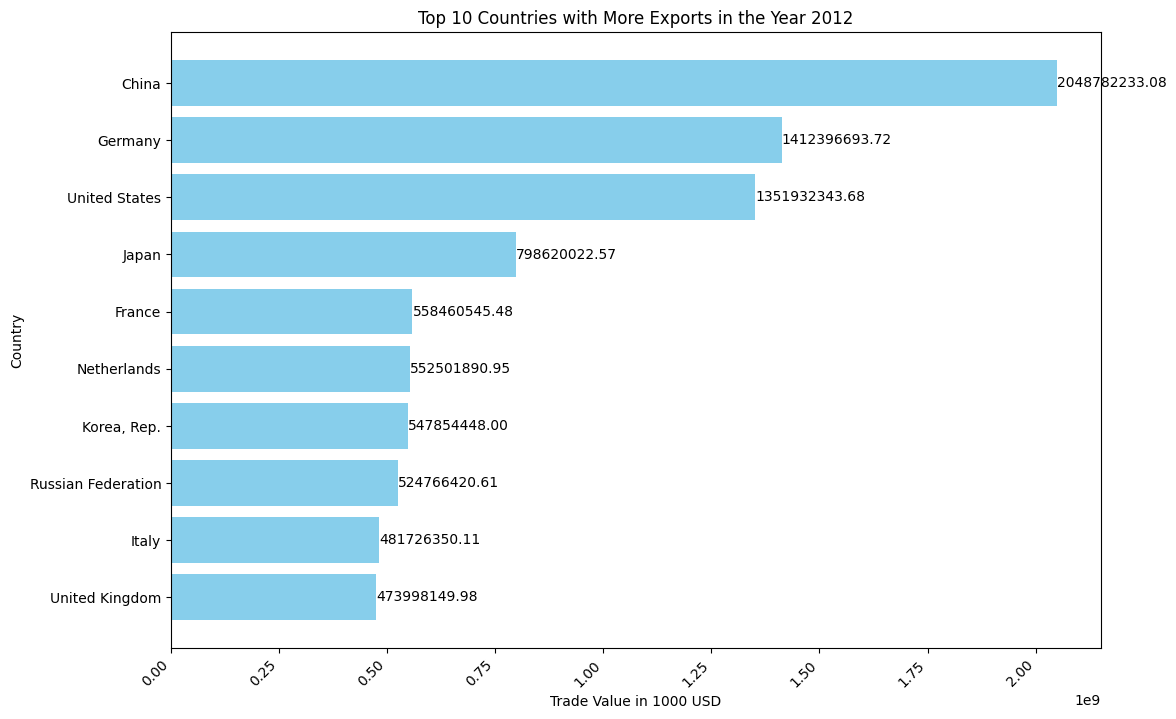

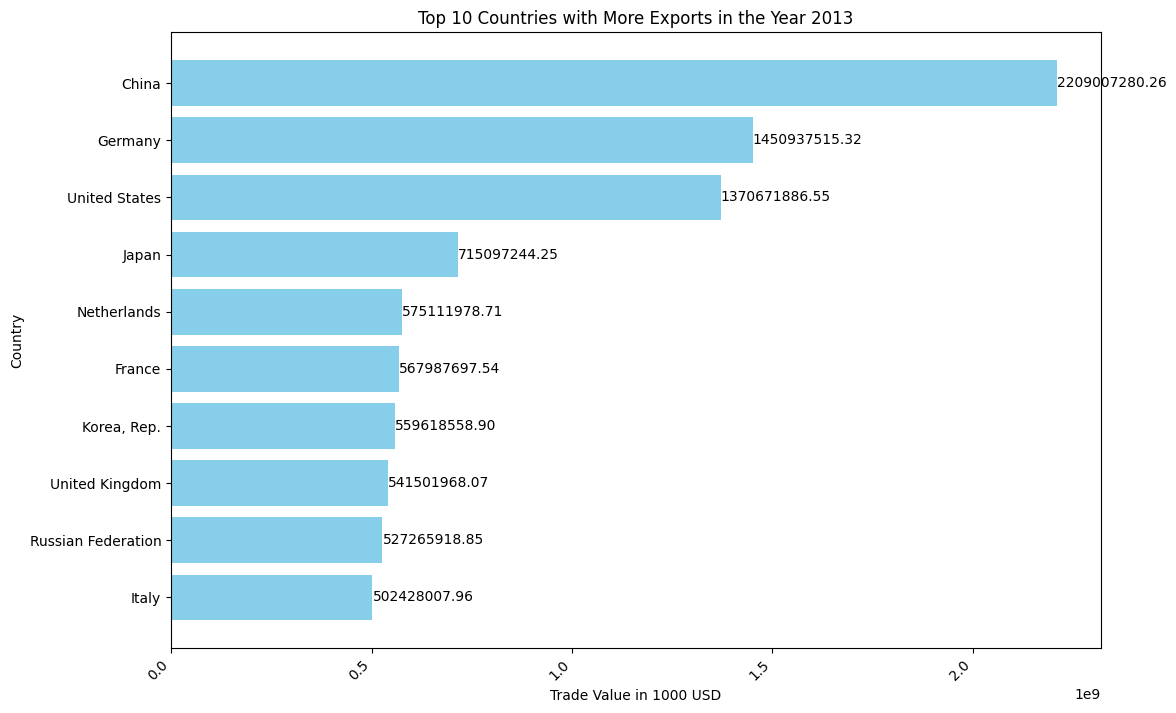

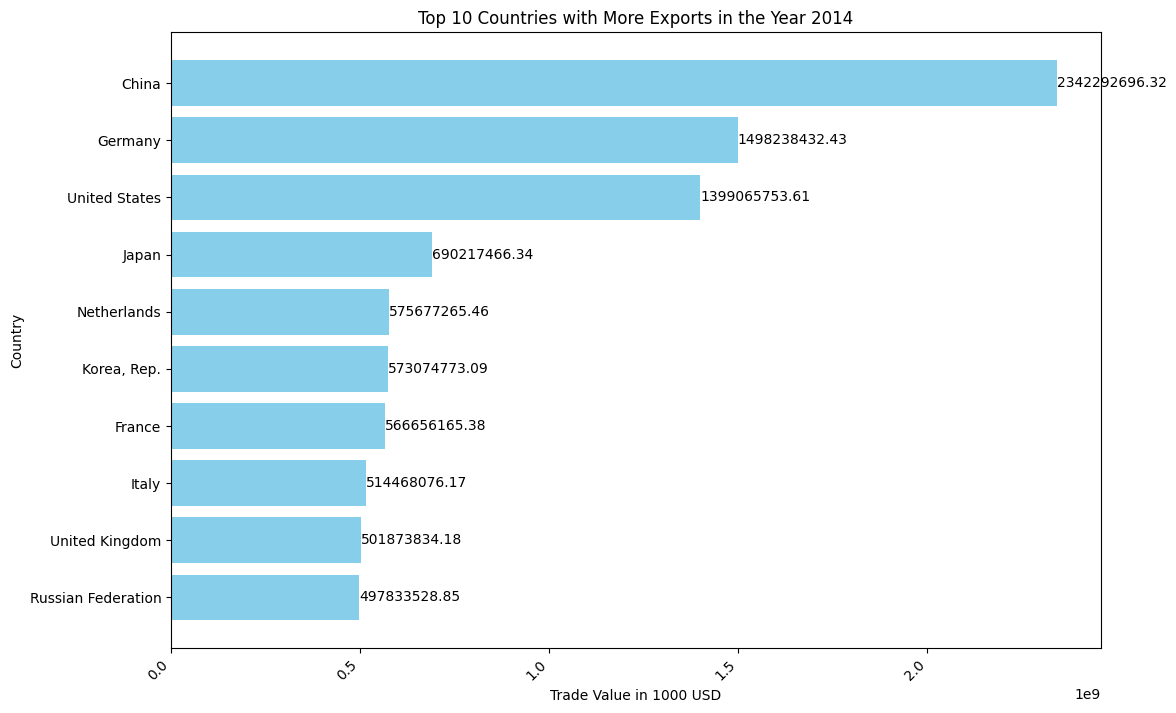

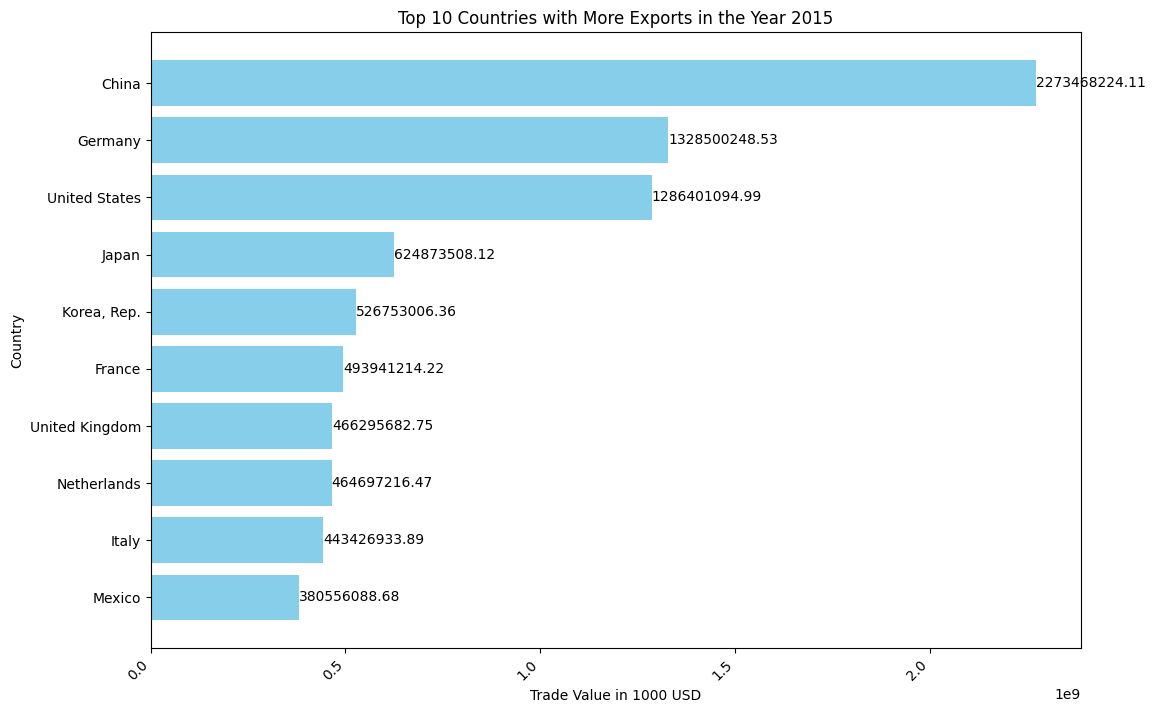

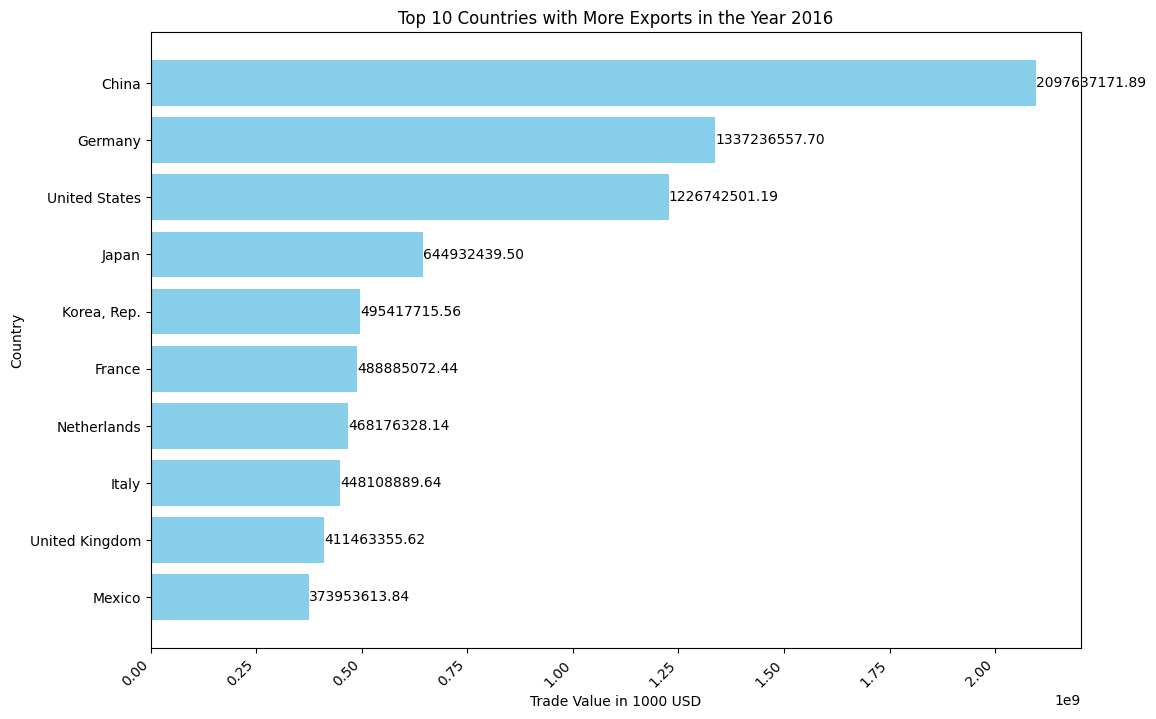

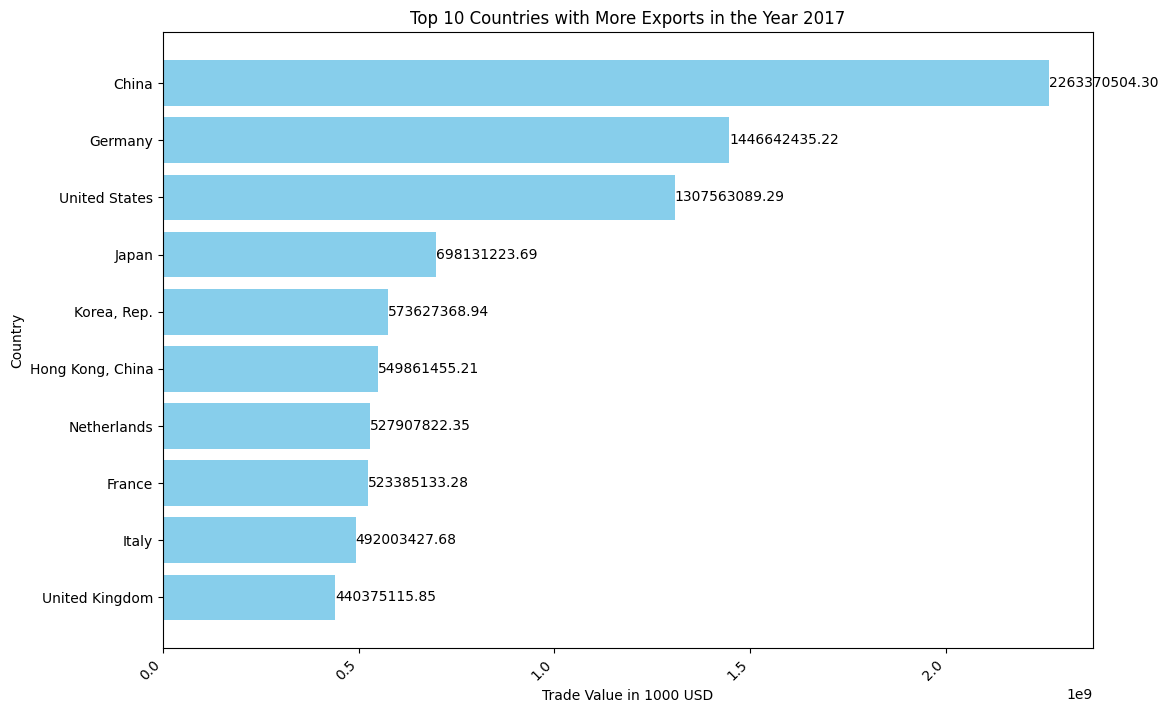

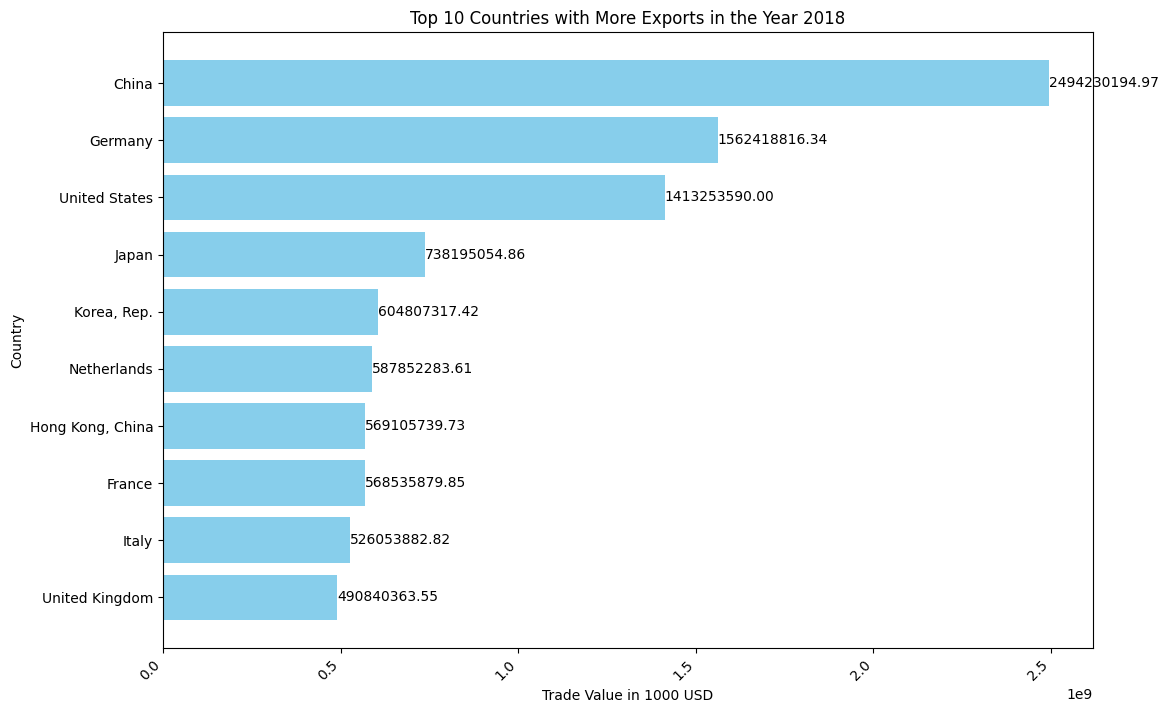

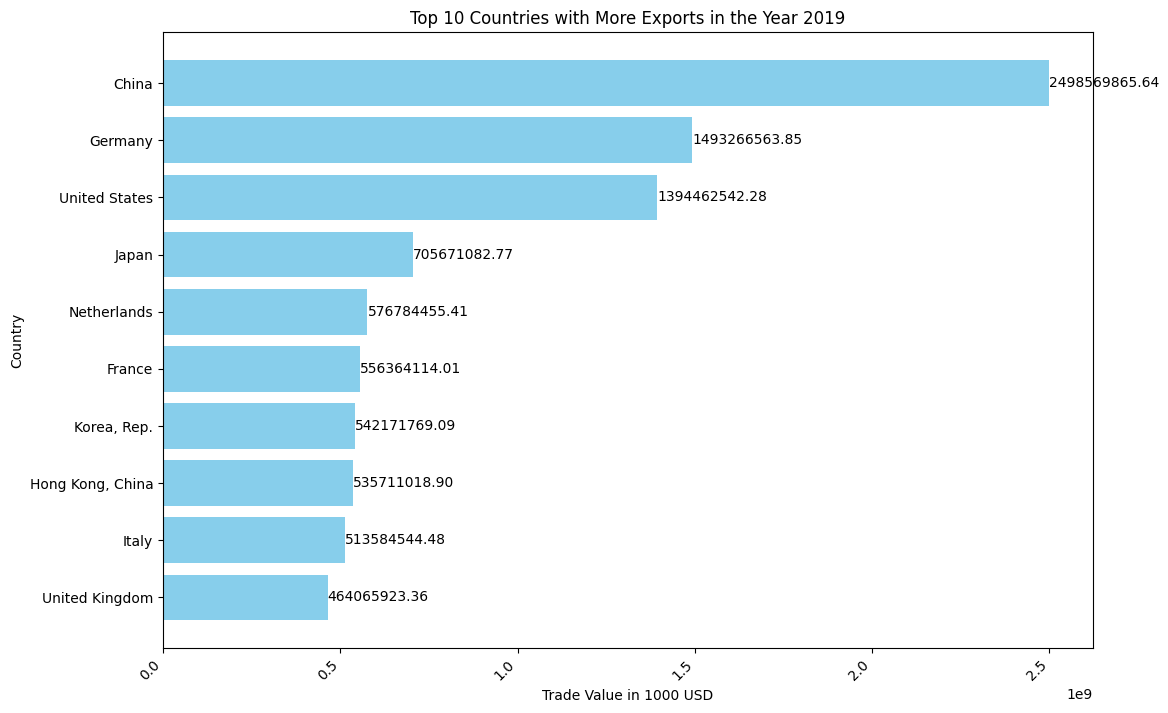

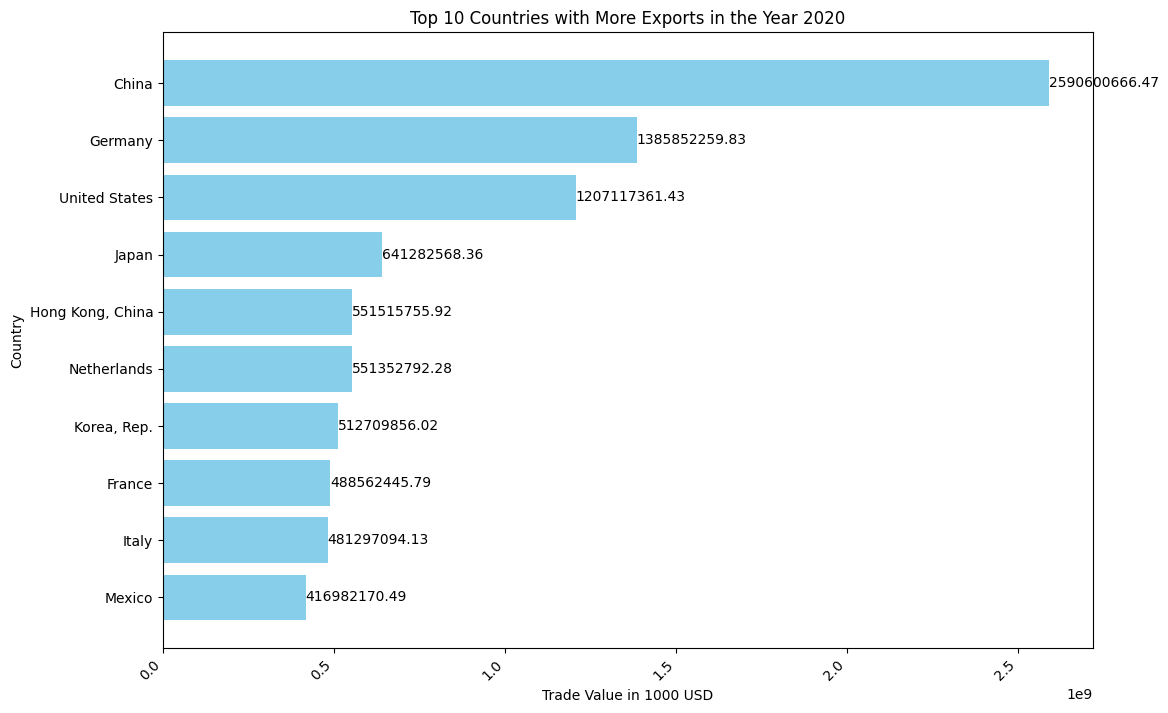

In [25]:
for year in range(2000, 2021):
    exports_year = df[(df['Year'] == year) & (df['Reporter'] != 'European Union')]
    
    exports_year = exports_year.sort_values(by='TradeValue', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    
    plt.barh(exports_year['Reporter'], exports_year['TradeValue'], color='skyblue')
    
    plt.xlabel('Trade Value in 1000 USD')
    plt.ylabel('Country')
    plt.title(f'Top 10 Countries with More Exports in the Year {year}')
    
    plt.gca().invert_yaxis()
    
    for index, value in enumerate(exports_year['TradeValue']):
        plt.text(value, index, f'{value:.2f}', va='center')
        

    plt.savefig(os.path.join('graphs2/exp/', f'top_exports_{year}.png'))

In [14]:
for year in range(2000, 2020):

    exports_year = df[(df['Year'] == year)]
    exports_year = exports_year.sort_values(by='TradeValue', ascending=False).head(10)
    
    fig = px.bar(exports_year, x='Reporter', y='TradeValue', 
                 color='Reporter',
                hover_name='Reporter', 
                 title=f'Top 10 Countries with more Exports in the year {year}',
                 labels={'TradeValue': 'Trade Value in 1000 USD)', 'Reporter': 'Country'},)
    
    fig.update_layout(width=1000, height=600)
    
    fig.show()

pio.write_html(fig, file=f'graphs2/exp/top_exports_{year}.html', auto_open=False)

## 2.2.3 Top 10 países con menos exportaciones 2000 - 2020

C:\Users\maarp\AppData\Local\Temp\ipykernel_30336\4109418081.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


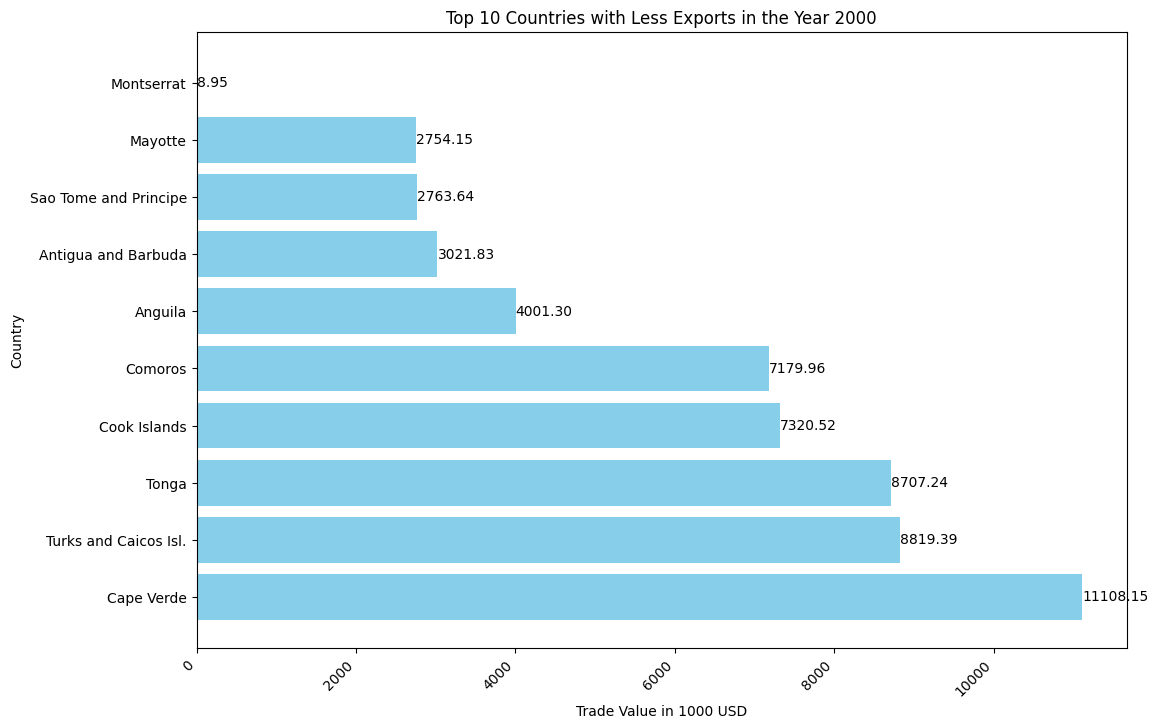

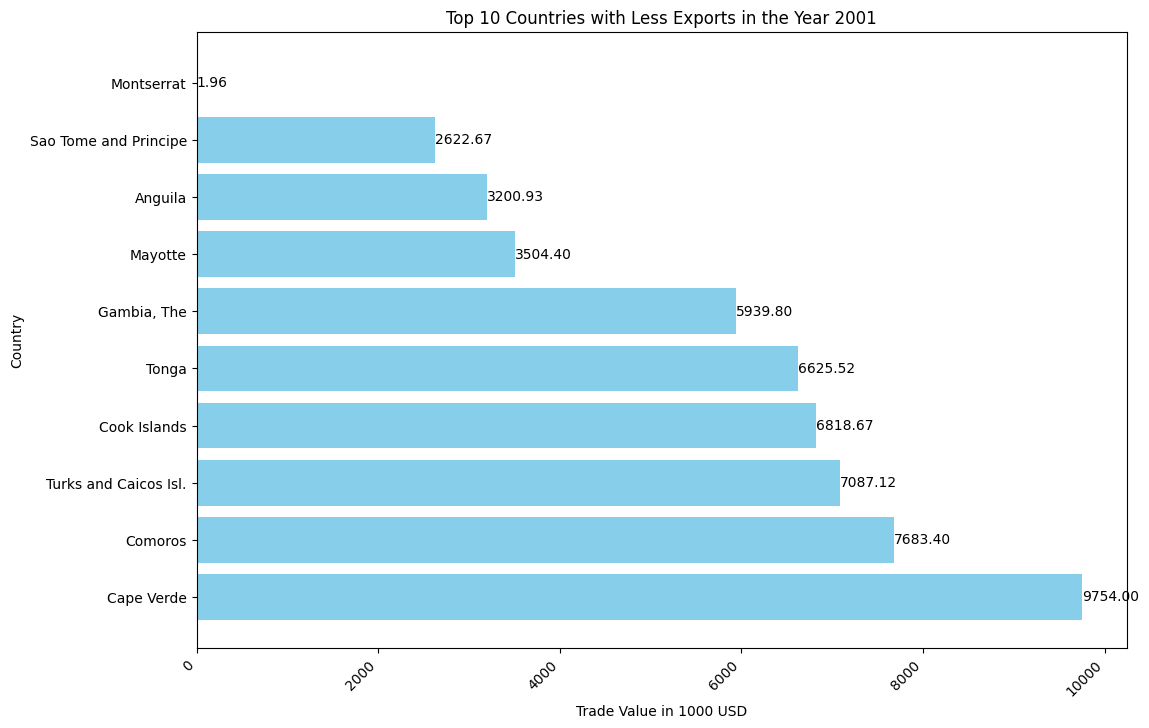

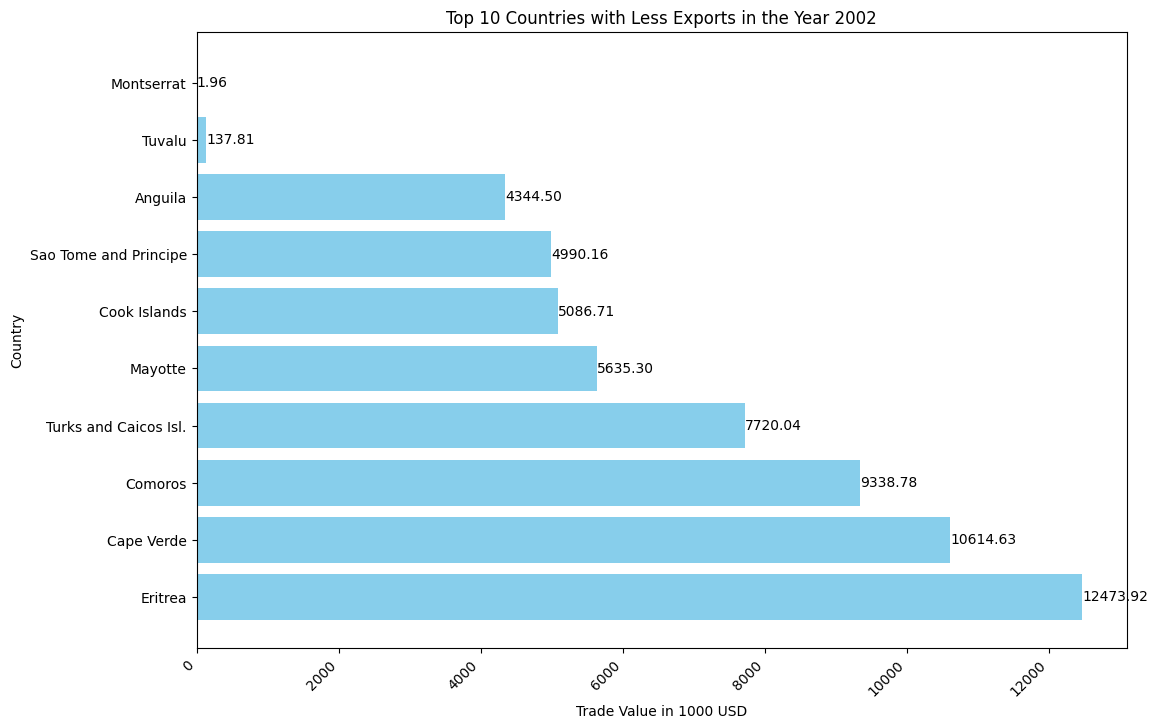

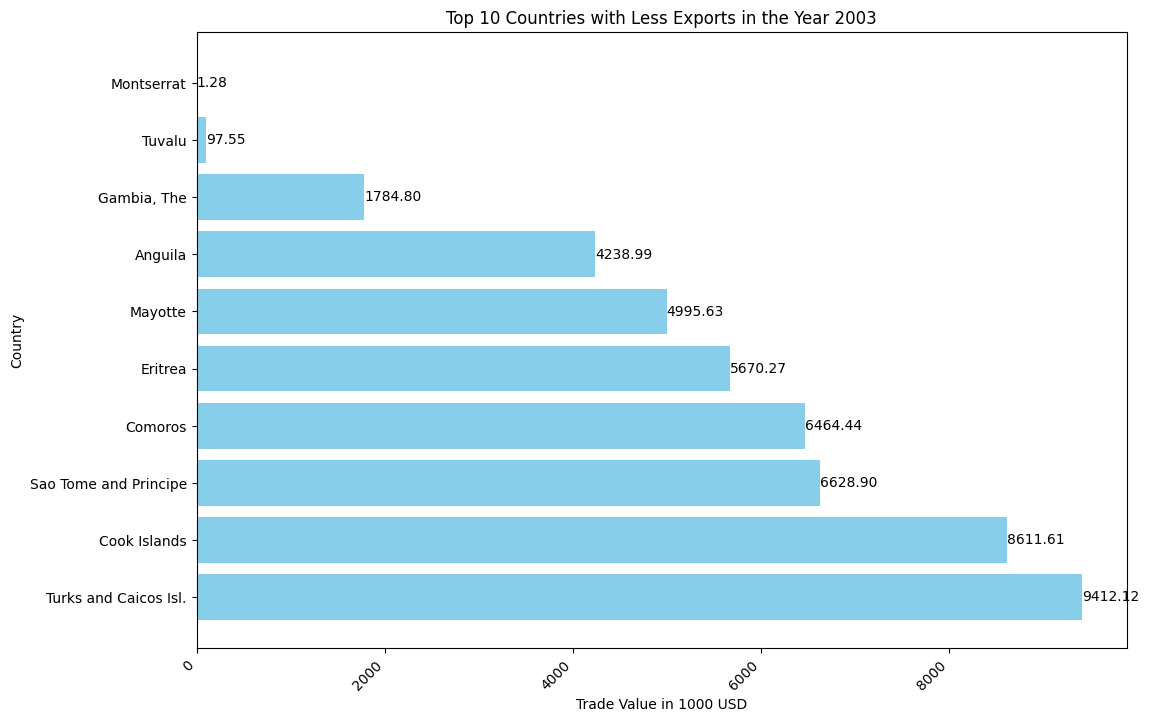

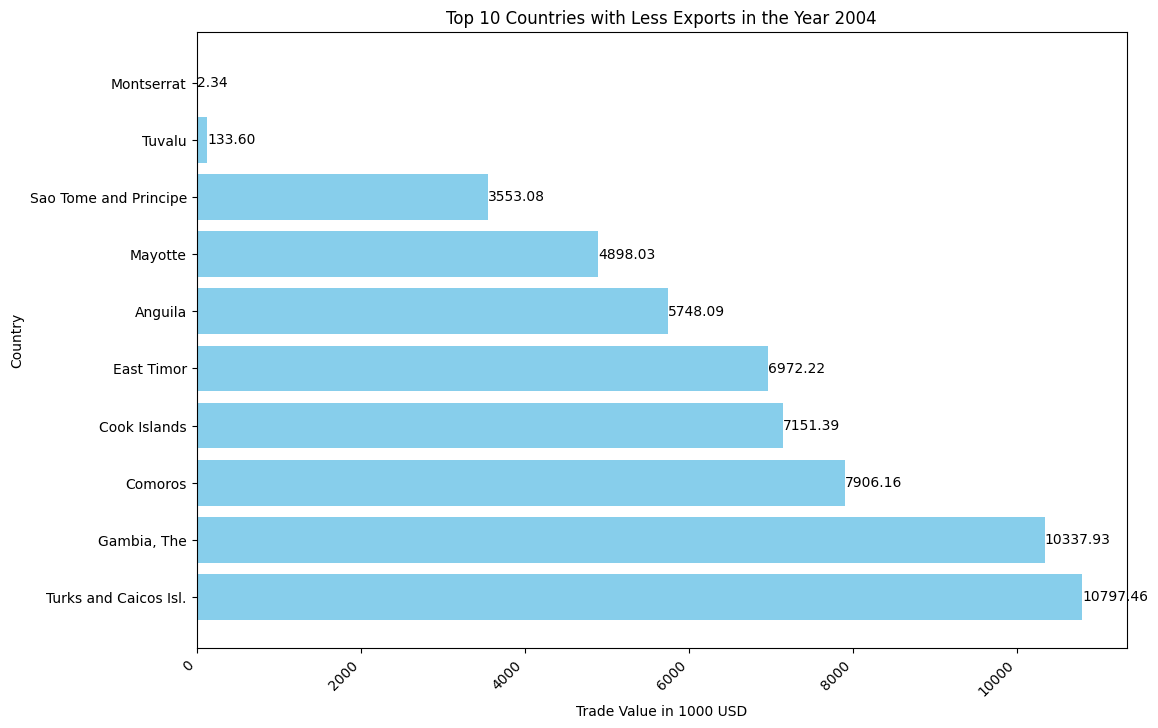

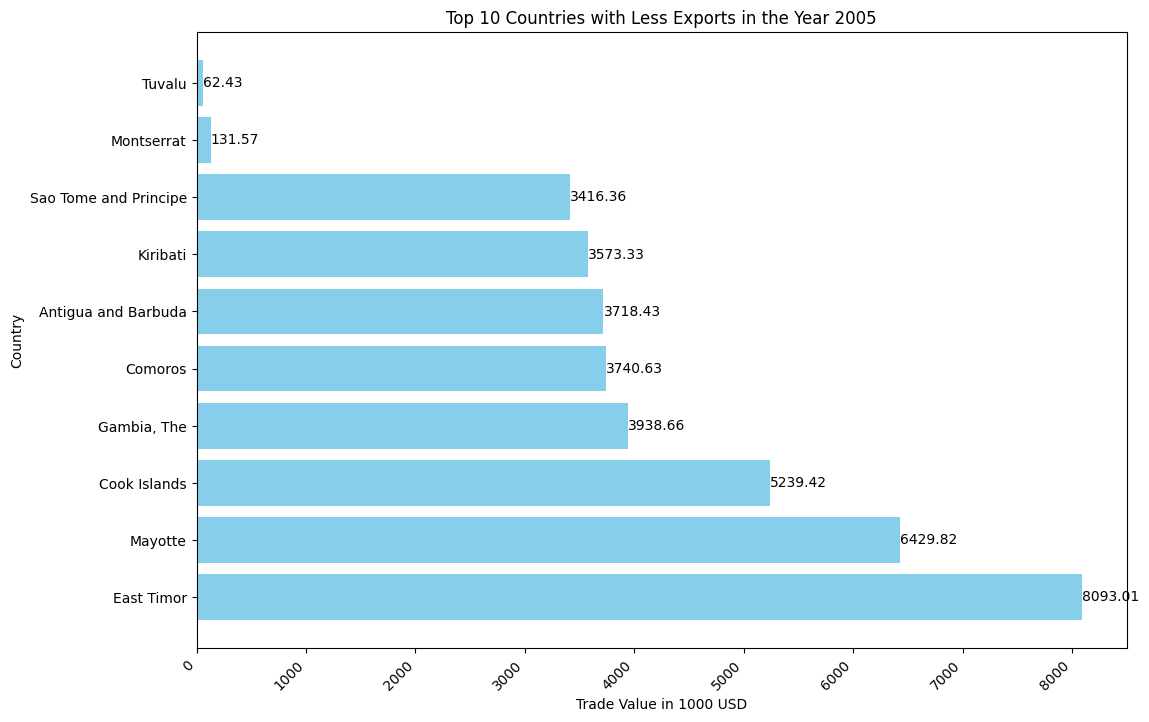

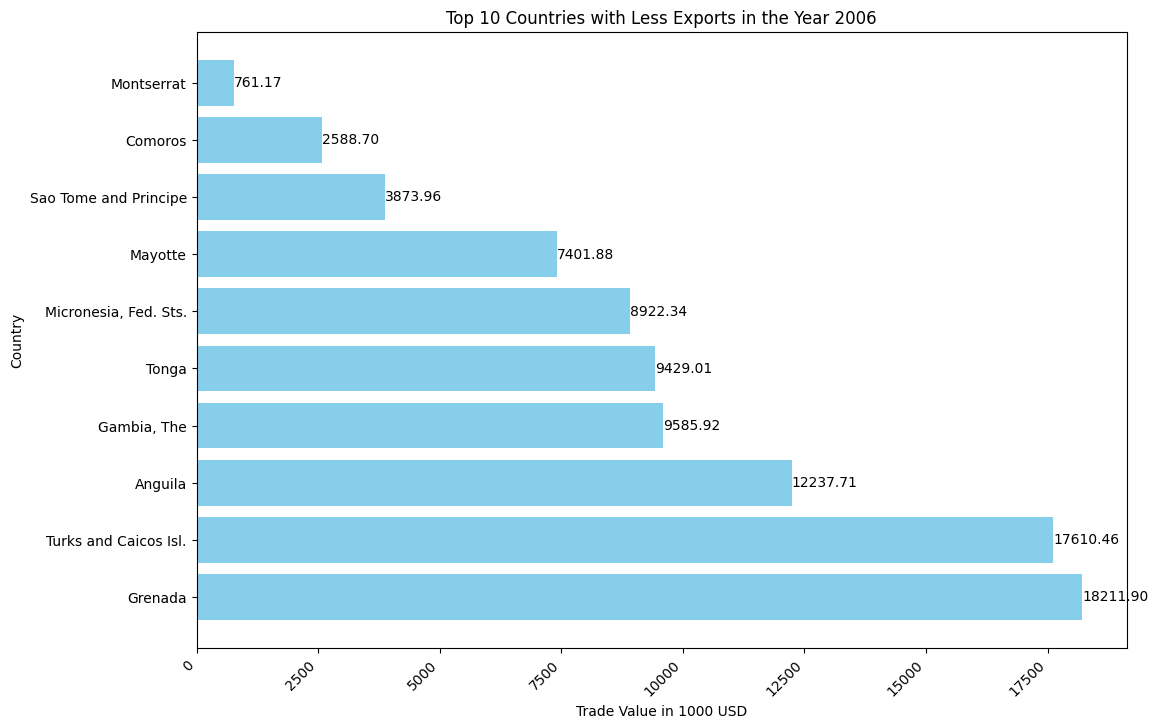

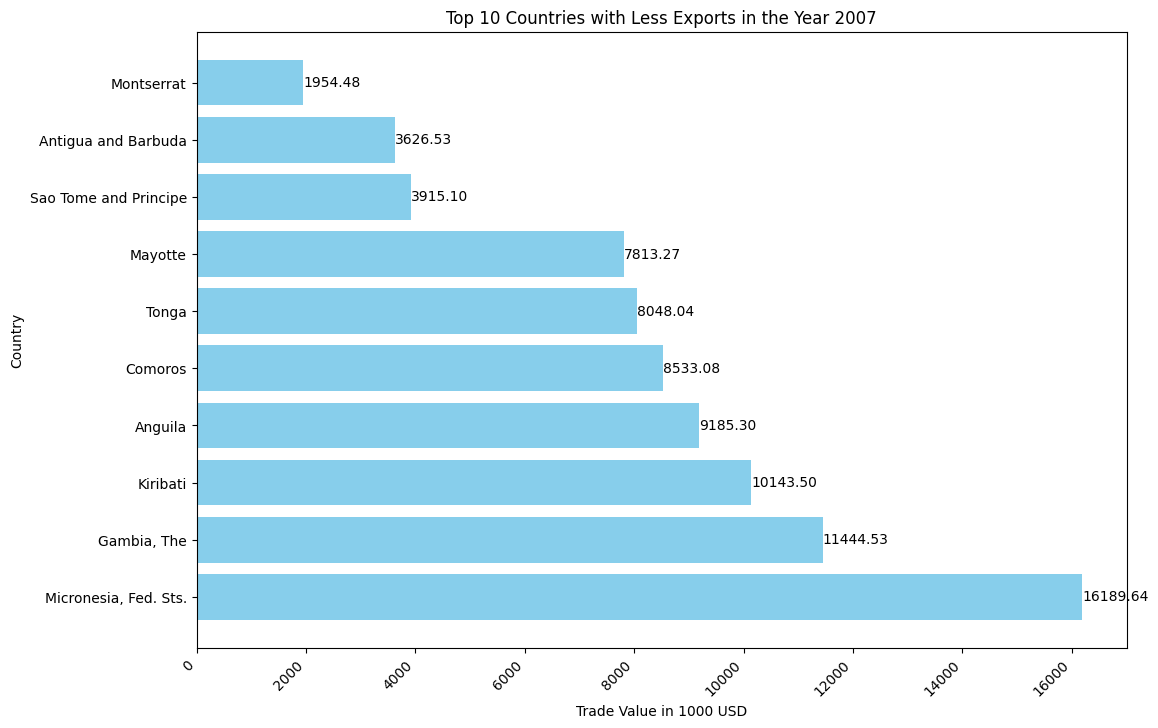

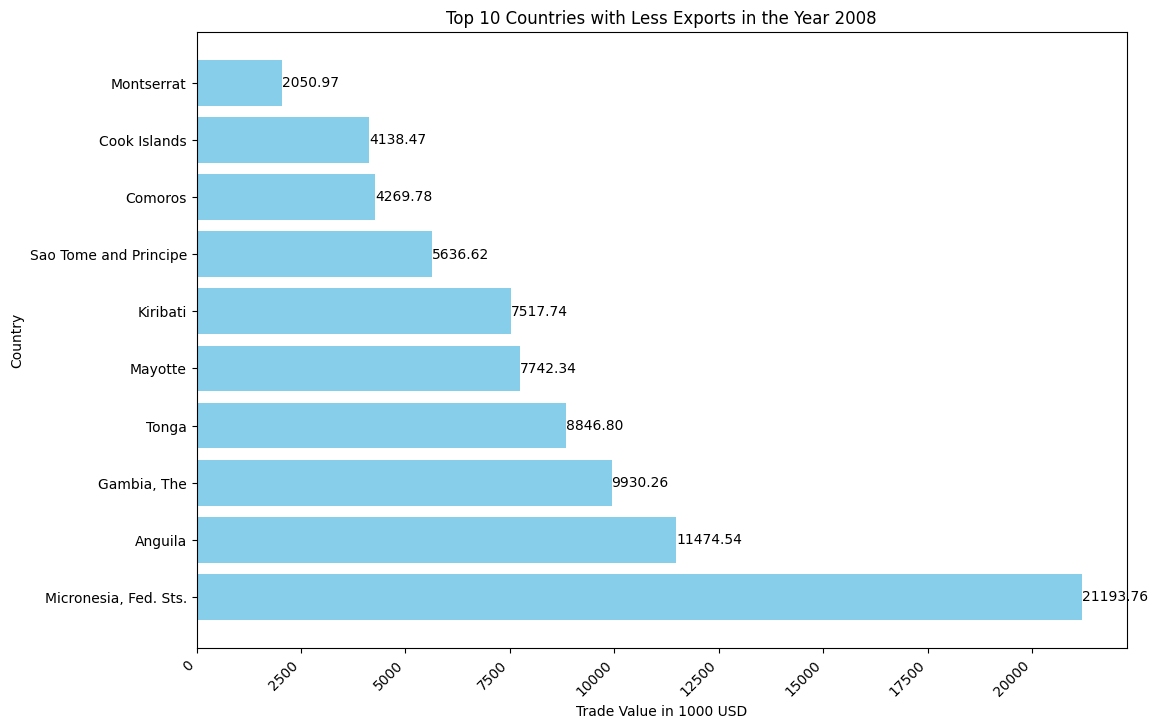

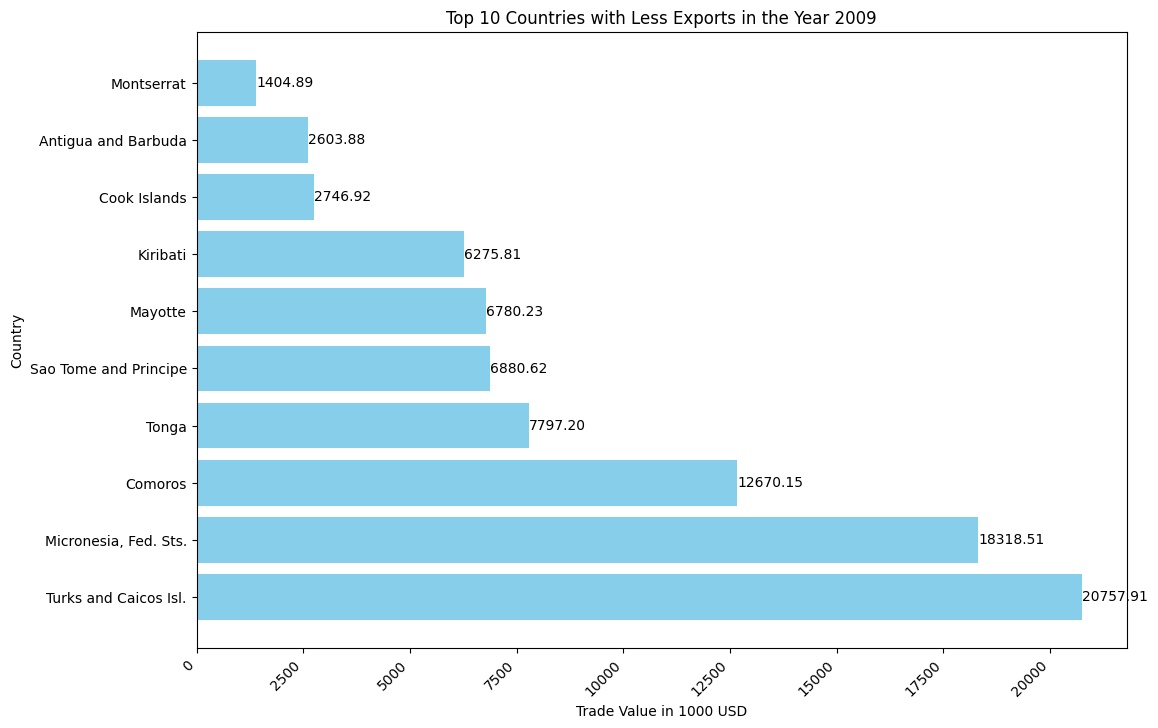

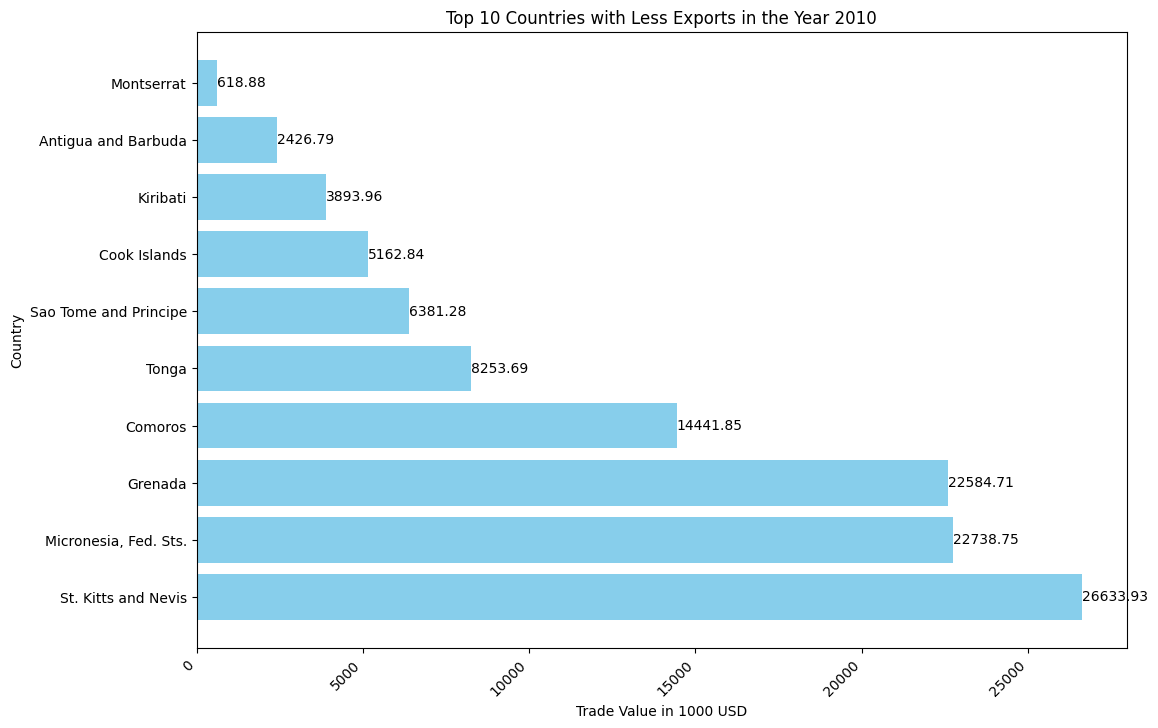

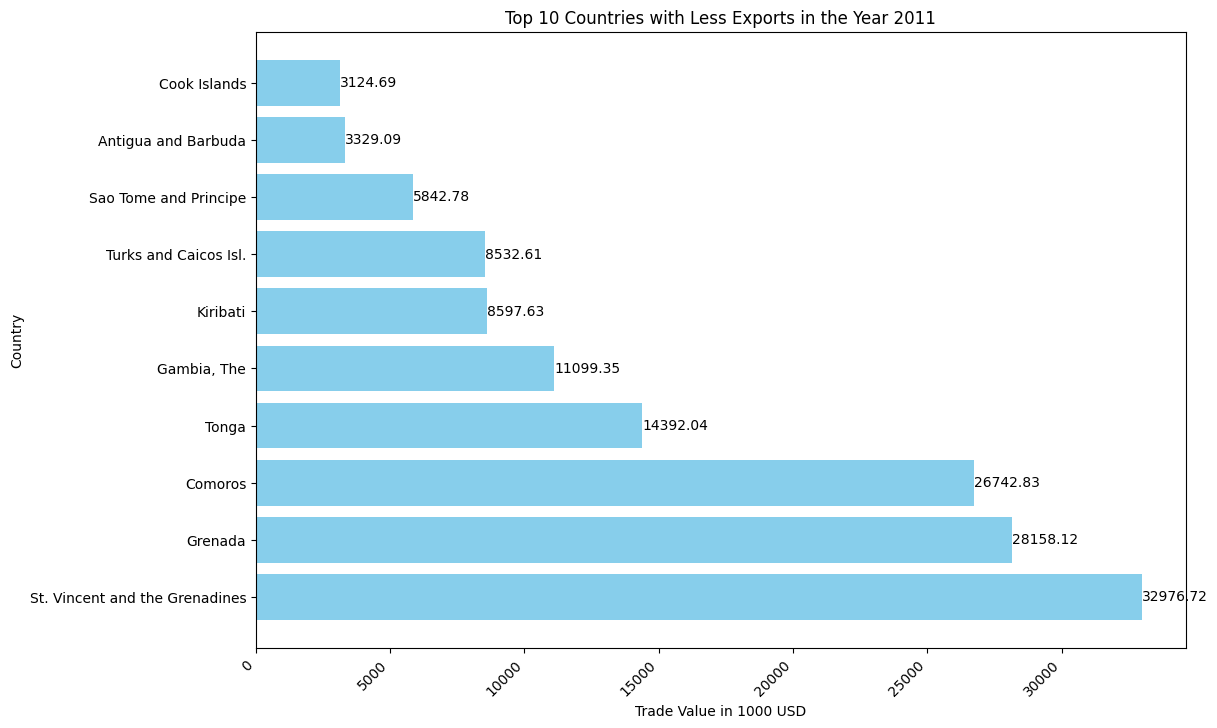

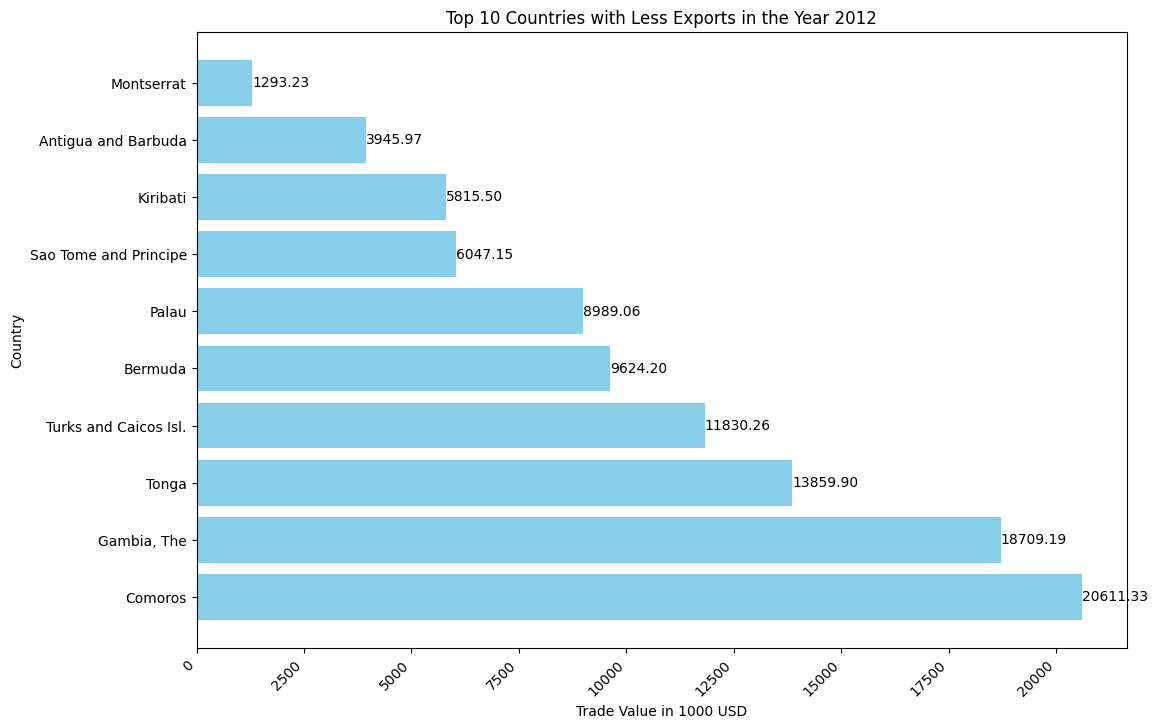

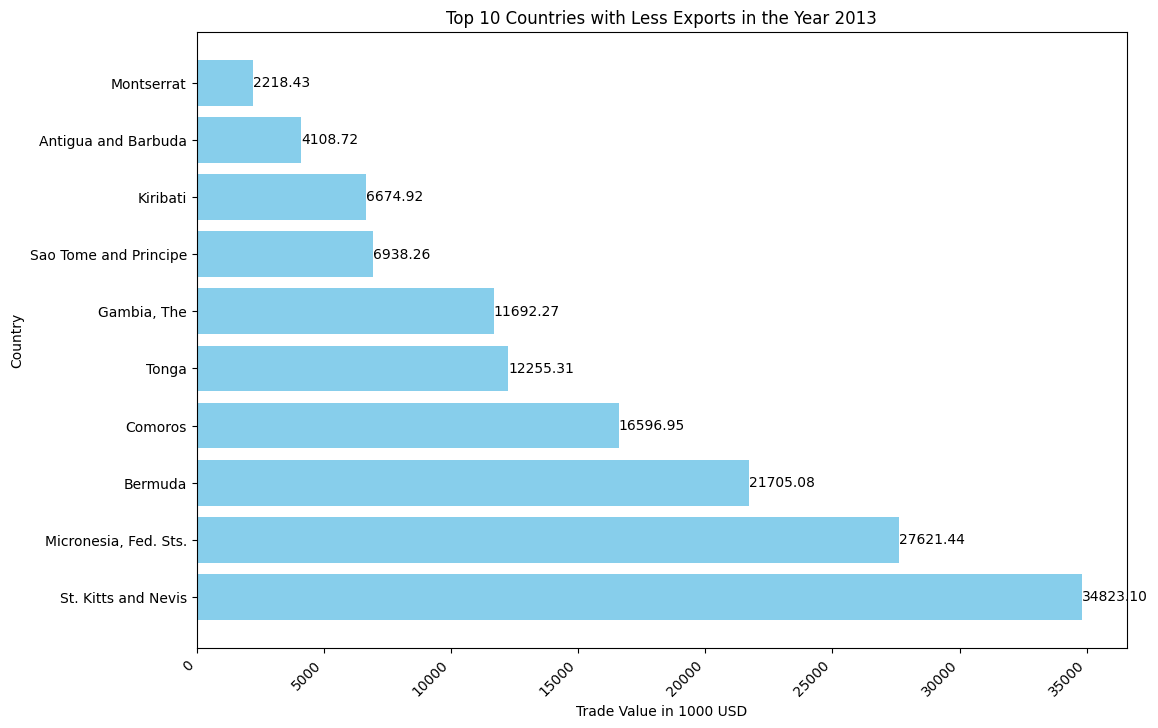

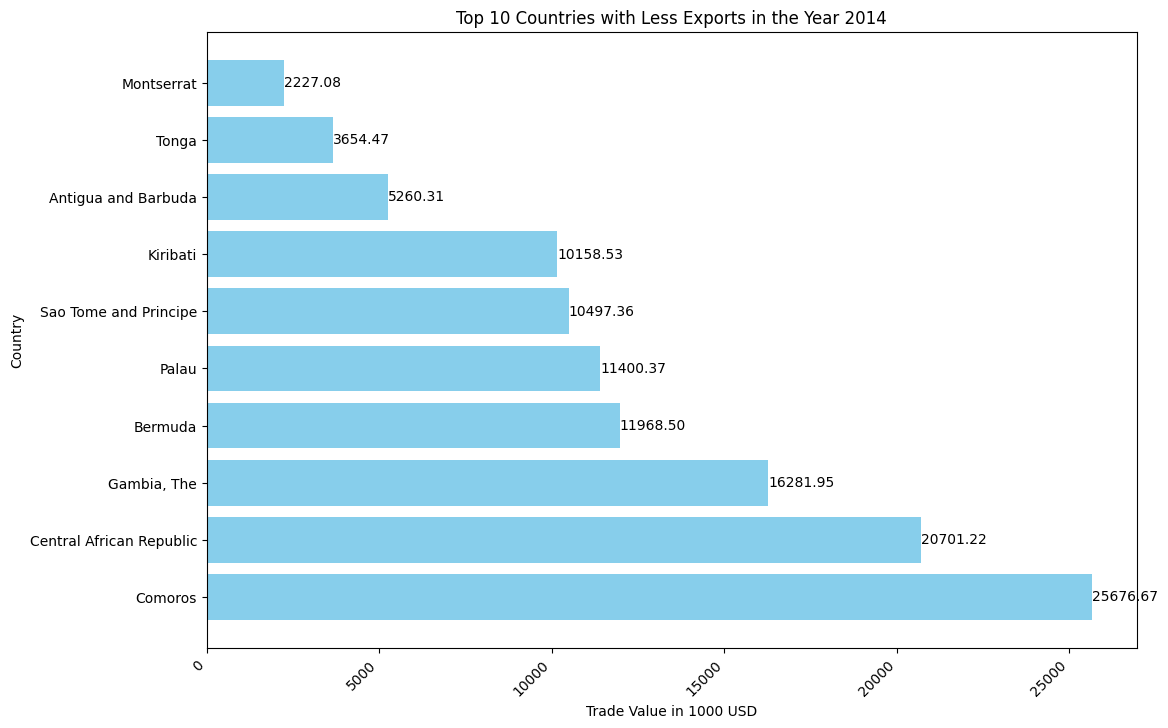

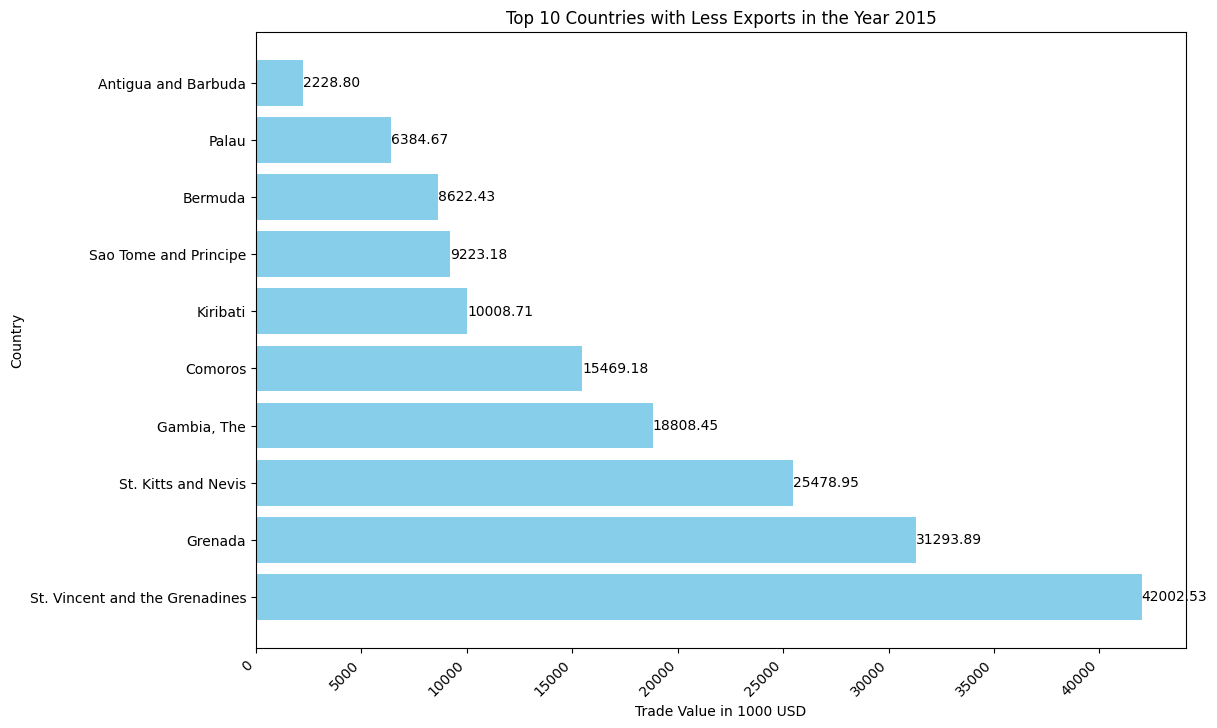

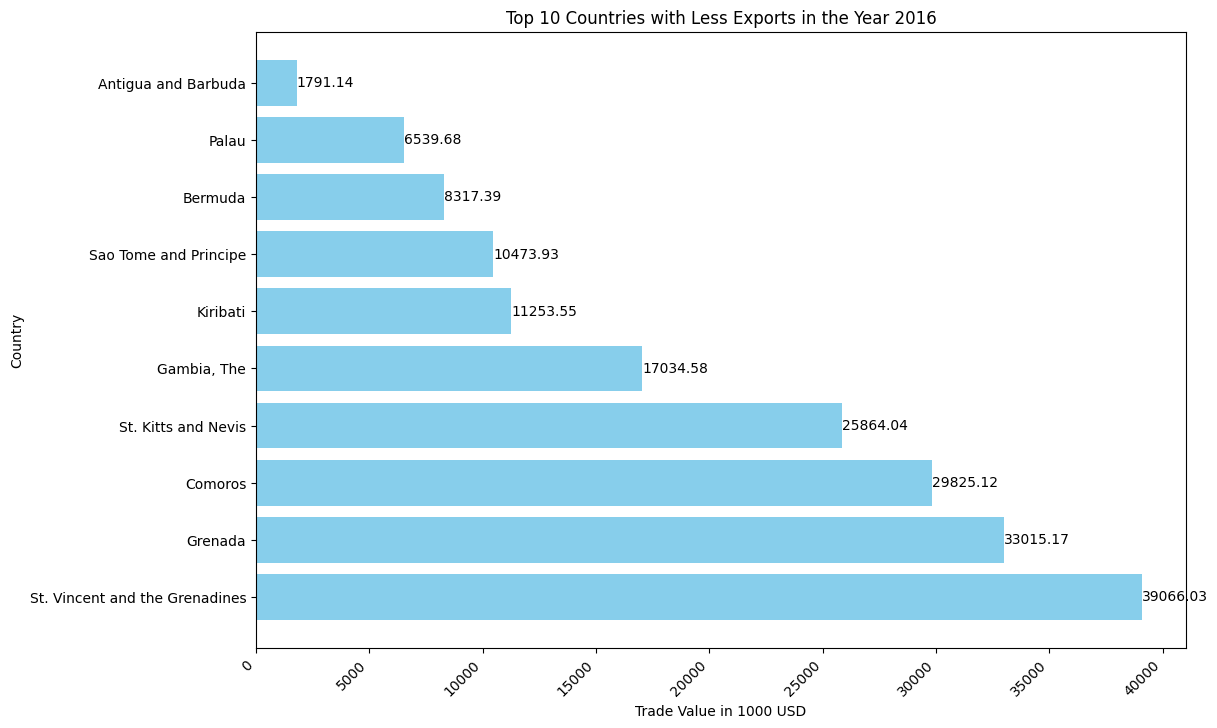

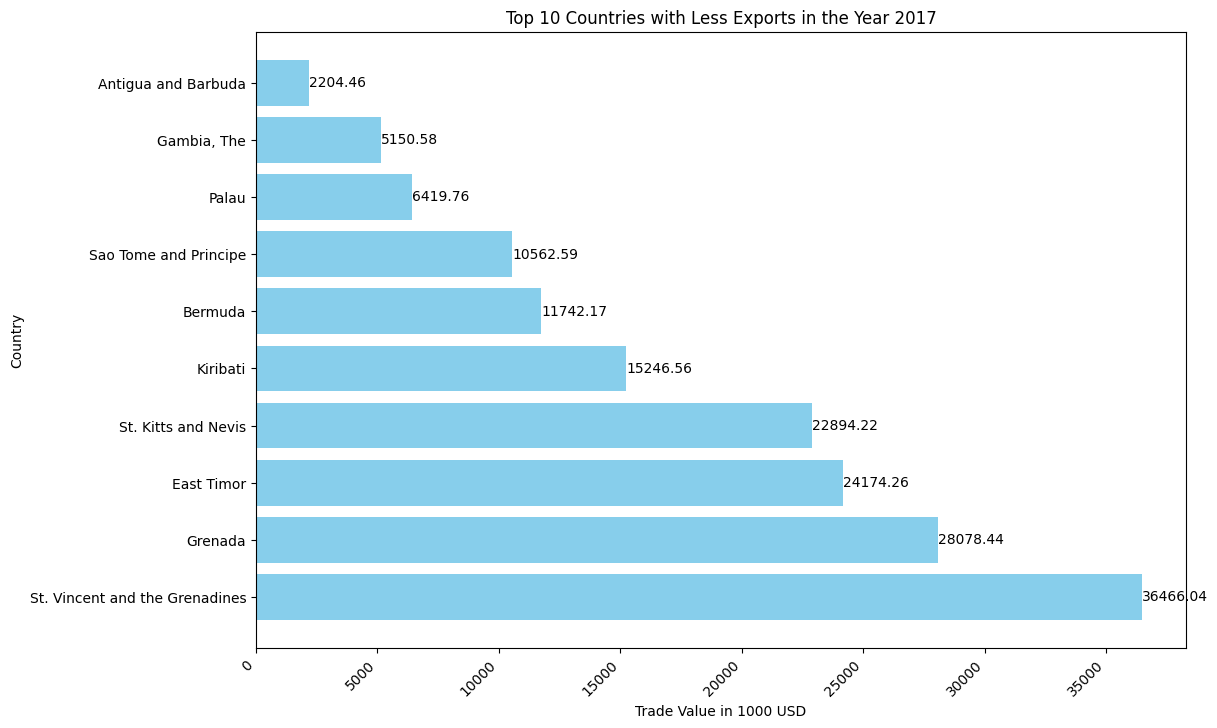

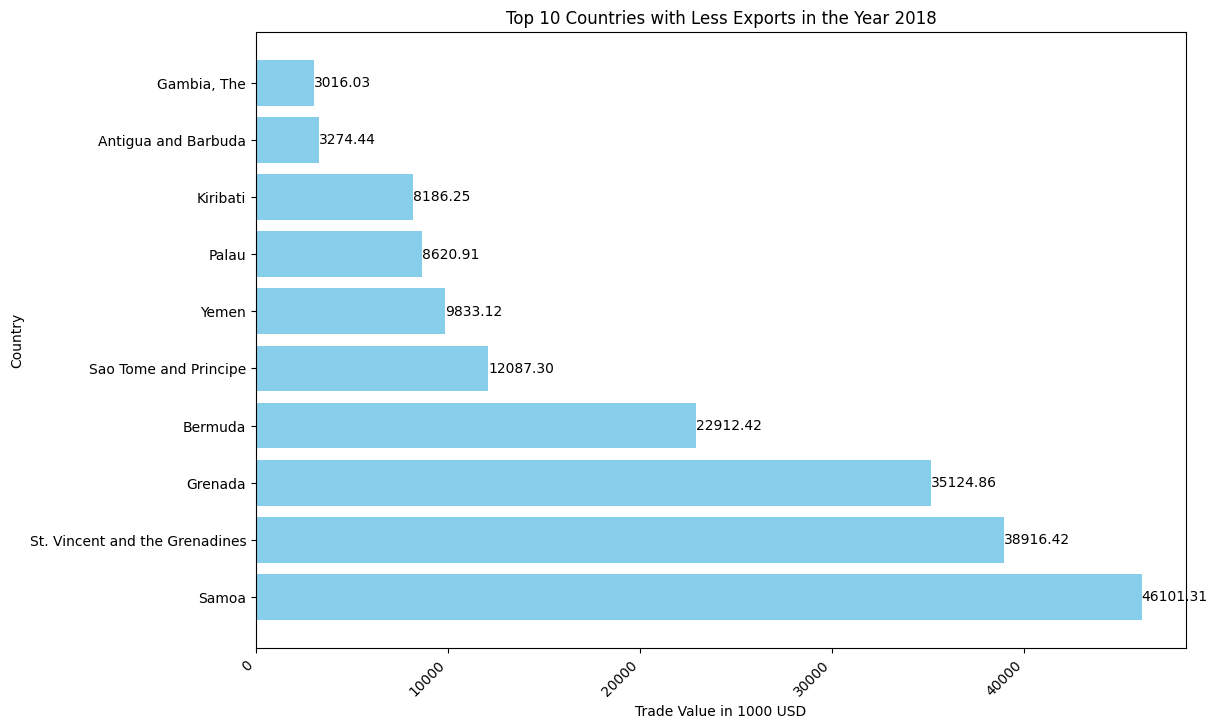

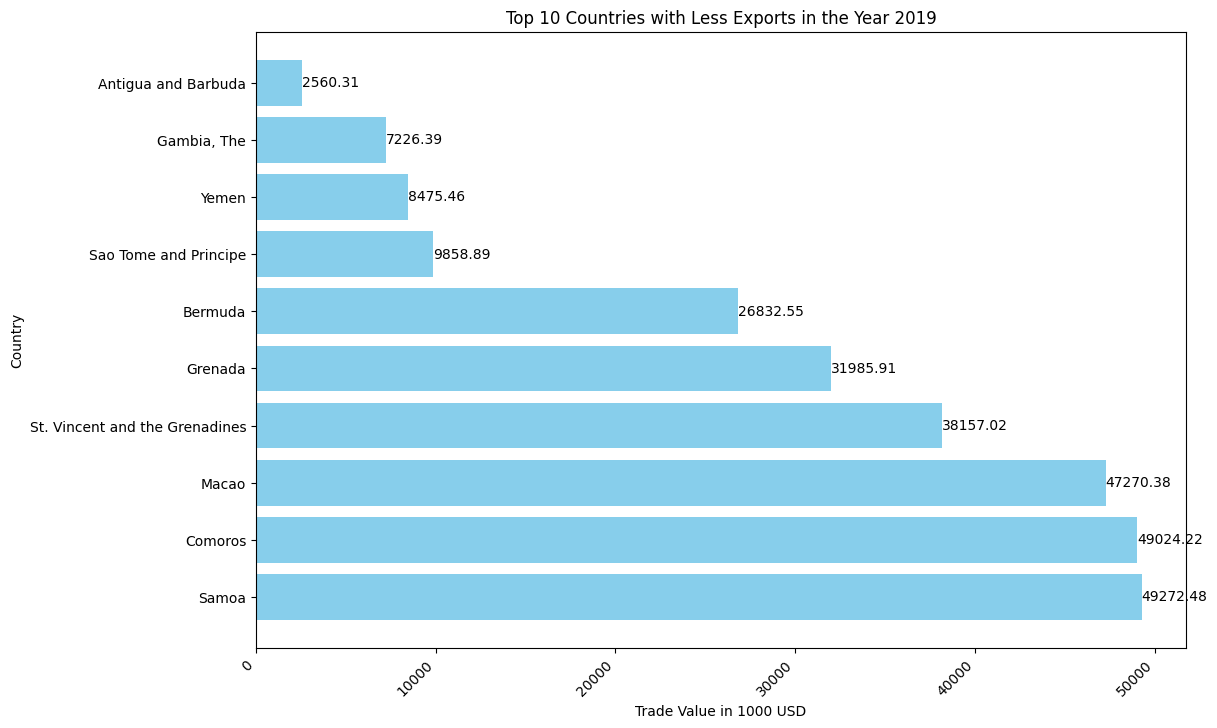

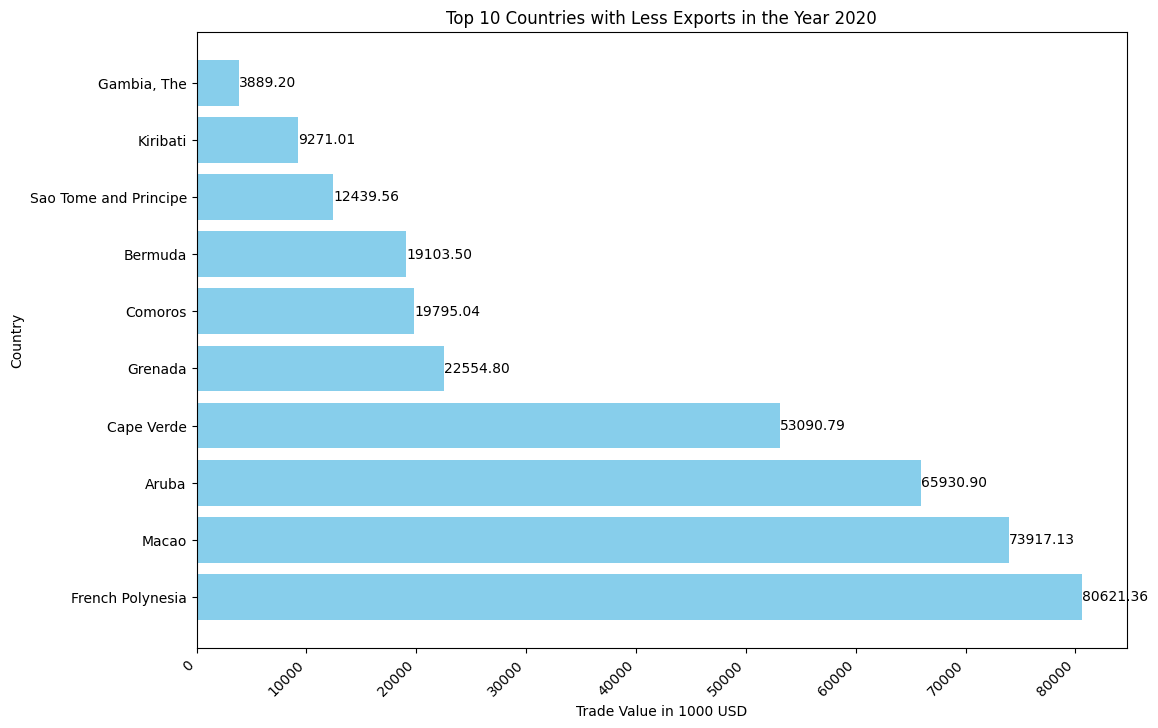

In [24]:
for year in range(2000, 2021):
    exports_year = df[(df['Year'] == year) & (df['Reporter'] != 'European Union')]
    
    exports_year = exports_year.sort_values(by='TradeValue', ascending=True).head(10)
    
    plt.figure(figsize=(12, 8))
    
    plt.barh(exports_year['Reporter'], exports_year['TradeValue'], color='skyblue')
    
    plt.xlabel('Trade Value in 1000 USD')
    plt.ylabel('Country')
    plt.title(f'Top 10 Countries with Less Exports in the Year {year}')
    
    plt.gca().invert_yaxis()
    
    for index, value in enumerate(exports_year['TradeValue']):
        plt.text(value, index, f'{value:.2f}', va='center')
        
    plt.xticks(rotation=45, ha='right')

    plt.savefig(os.path.join('graphs2/exp/', f'bottom_exports_{year}.png'))